## 对比预测结果

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import os

path = './output/different_date/'
dates = [i for i in range(1,22)]
for date in dates:
    high_potential = pd.read_csv(path + '0_shortest_path/' + 'simulation_date_{}.csv'.format(date))
    shortest_path = pd.read_csv(path + '1_shortest_path/' + 'simulation_date_{}.csv'.format(date))
    optimized = pd.read_csv(path + 'optimize/' + 'simulation_date_{}.csv'.format(date))

optimized.head()


OD_id  O_location  D_location  his_order_num  responded_order_num  \
0      0          17         428              1                    1   
1      1          19        1048              1                    1   
2      2          19        1738              1                    1   
3      3          19        2364              1                    1   
4      4          19        2400              1                    1   

   pooled_order_num waitingtime detour_distance           pickup_time  \
0                 1       [3.0]           [0.0]   [52.38828924252591]   
1                 0          []              []  [61.516975775009854]   
2                 0          []              []  [139.00667930101793]   
3                 0          []              []  [118.18658475765677]   
4                 0          []              []  [118.18658475765677]   

       shared_distance total_travel_distance saved_travel_distance  \
0  [6825.015480934438]   [6825.015480934438]   [2983.300333882713]   
1                   []   [468.6360348403841]                    []   
2                   []                    []                    []   
3                   []   [592.9363943321874]                    []   
4                   []   [592.9363943321874]                    []   

   response_rate  pooling_rate  avg_detour_distance  avg_pickup_distance  \
0            1.0           1.0                  0.0            52.388289   
1            1.0           0.0                  0.0            61.516976   
2            1.0           0.0                  0.0           139.006679   
3            1.0           0.0                  0.0           118.186585   
4            1.0           0.0                  0.0           118.186585   

   avg_shared_distance  avg_total_travel_distance  avg_saved_travel_distance  
0          6825.015481                6825.015481                2983.300334  
1             0.000000                 468.636035                   0.000000  
2             0.000000                   0.000000                   0.000000  
3             0.000000                 592.936394                   0.000000  
4             0.000000                 592.936394                   0.000000

In [14]:
with open('output/different_date_optimize_results.pkl','rb') as f:
    tmp = pickle.load(f)

tmp.keys()

dict_keys(['2017-05-08', '2017-05-03', '2017-05-14', '2017-05-20', '2017-05-17', '2017-05-09', '2017-05-04', '2017-05-05', '2017-05-02', '2017-05-06', '2017-05-16', '2017-05-07', '2017-05-01', '2017-05-15', '2017-05-13', '2017-05-11', '2017-05-18', '2017-05-12', '2017-05-10', '2017-05-19', '2017-05-21'])

shortest_path dict_keys(['2017-05-08', '2017-05-03', '2017-05-14', '2017-05-20', '2017-05-17', '2017-05-09', '2017-05-04', '2017-05-05', '2017-05-02', '2017-05-06', '2017-05-16', '2017-05-07', '2017-05-01', '2017-05-15', '2017-05-13', '2017-05-11', '2017-05-18', '2017-05-12', '2017-05-10', '2017-05-19', '2017-05-21'])


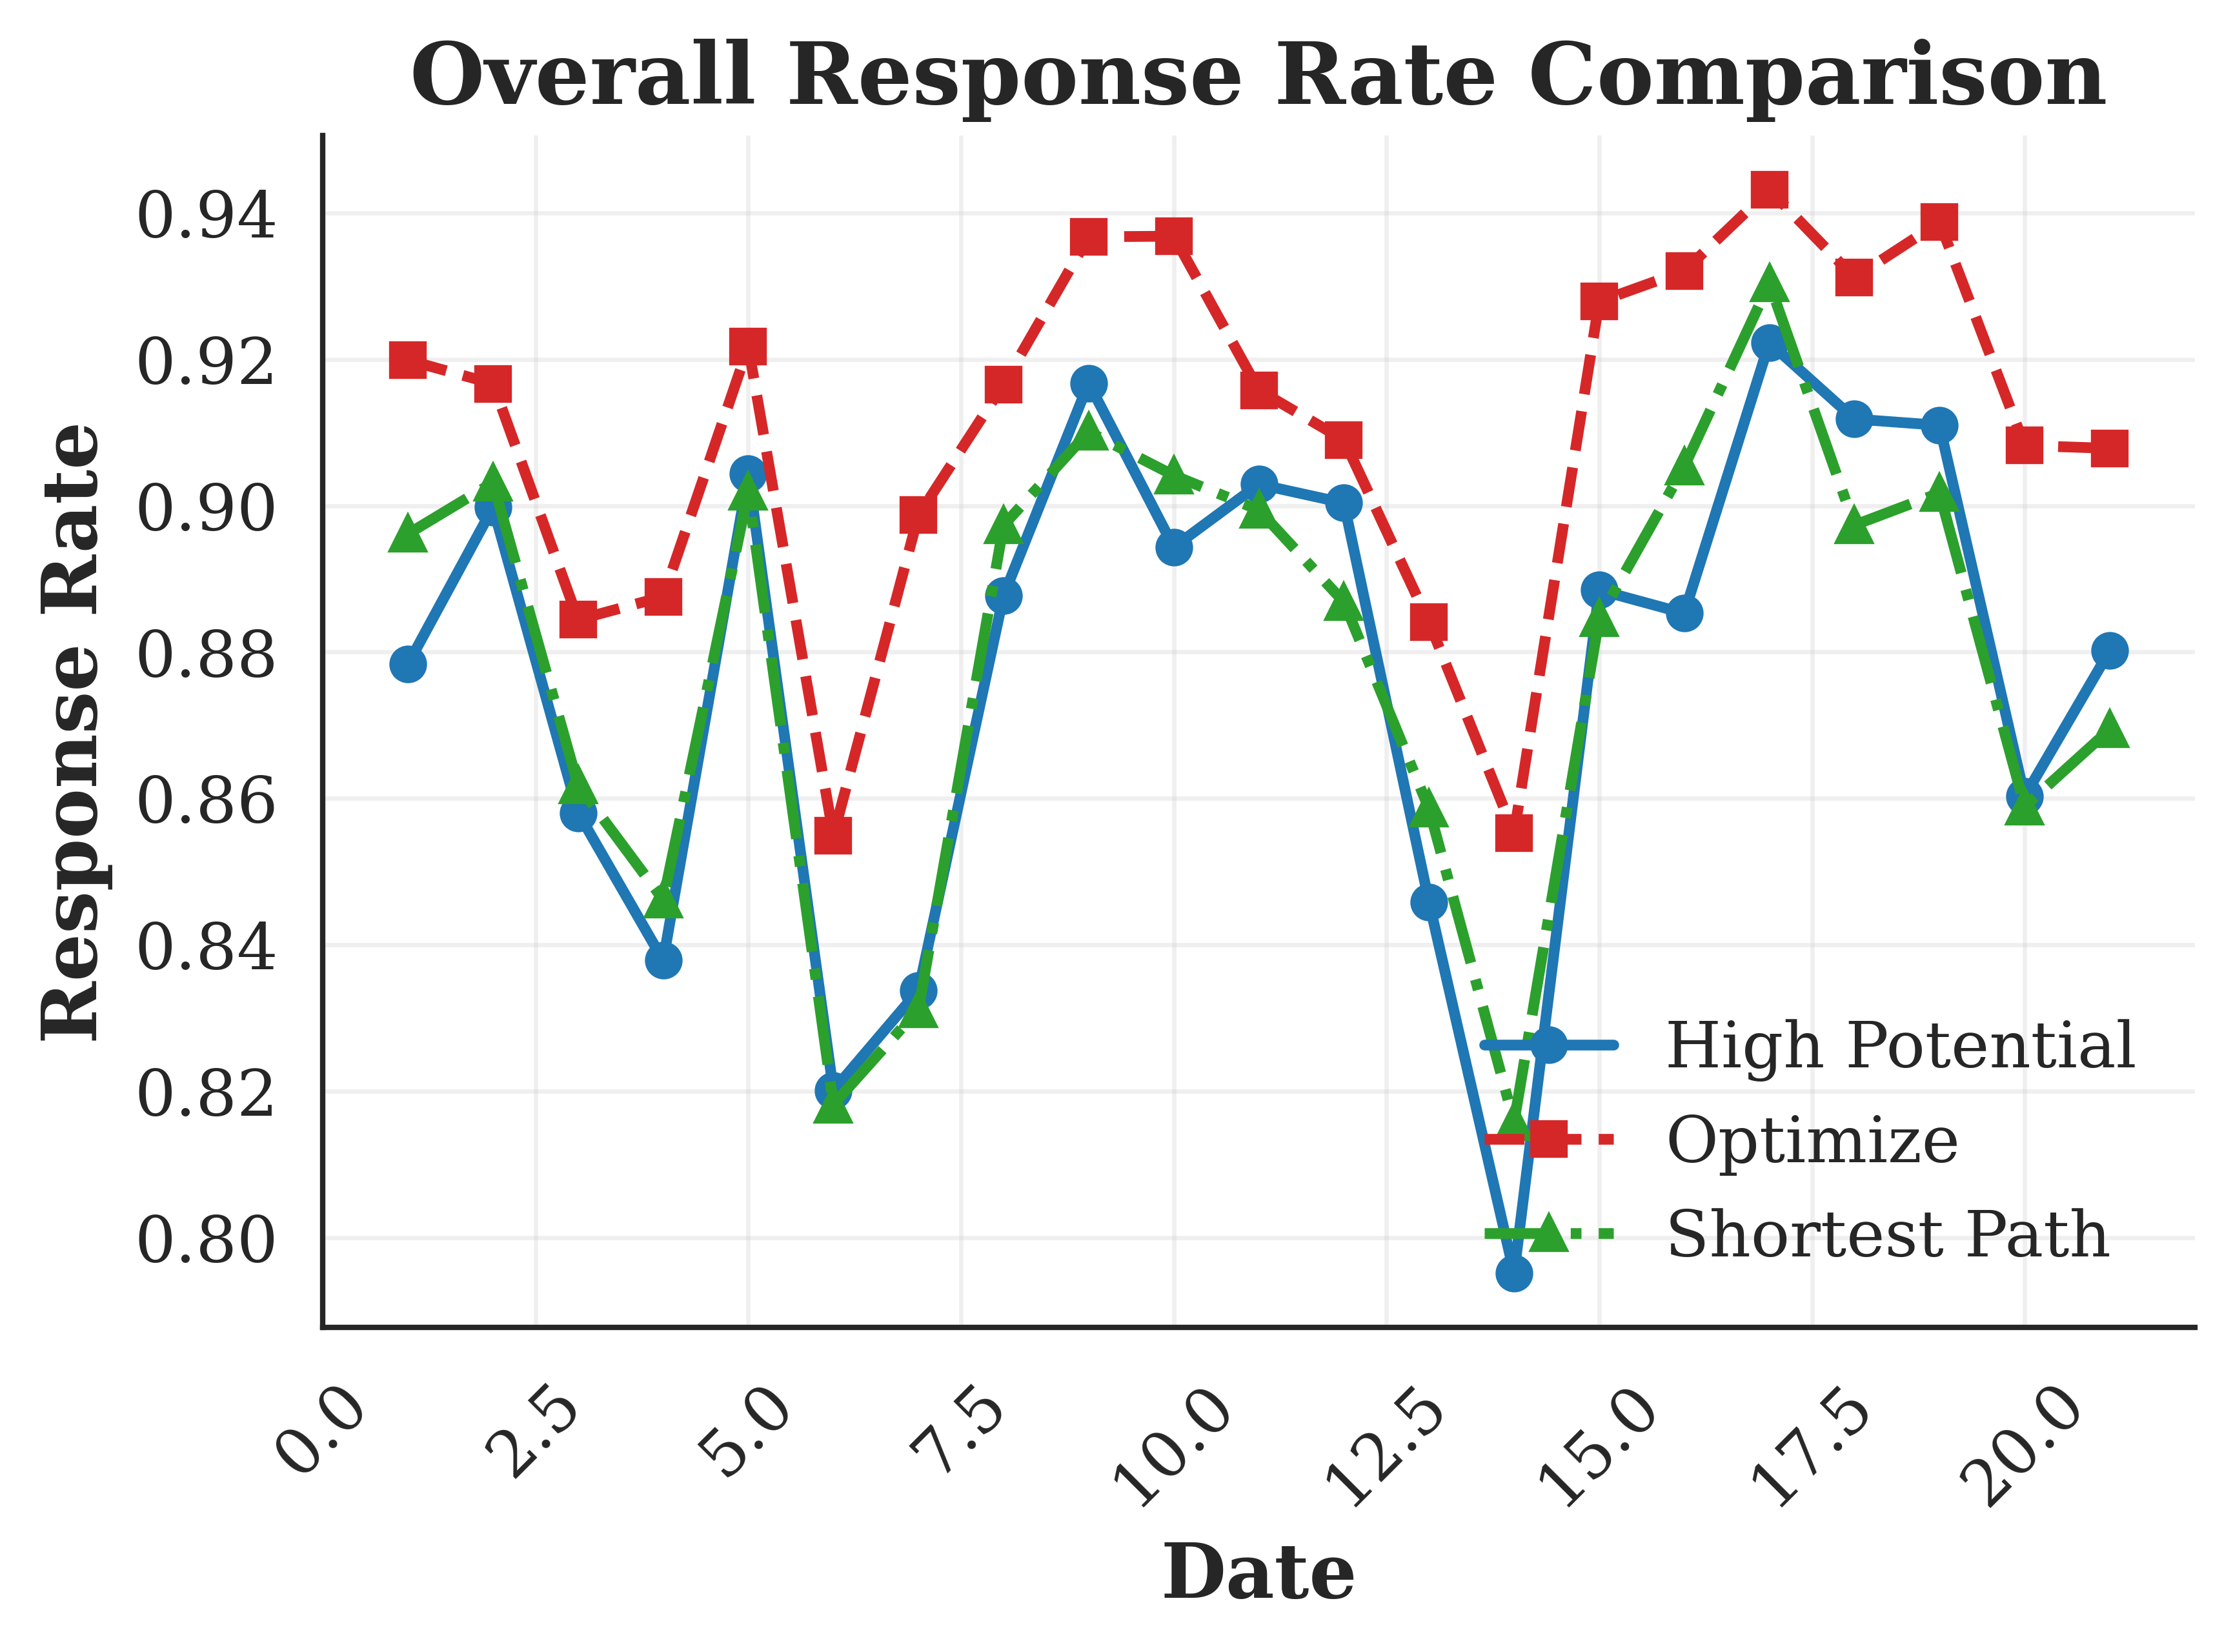

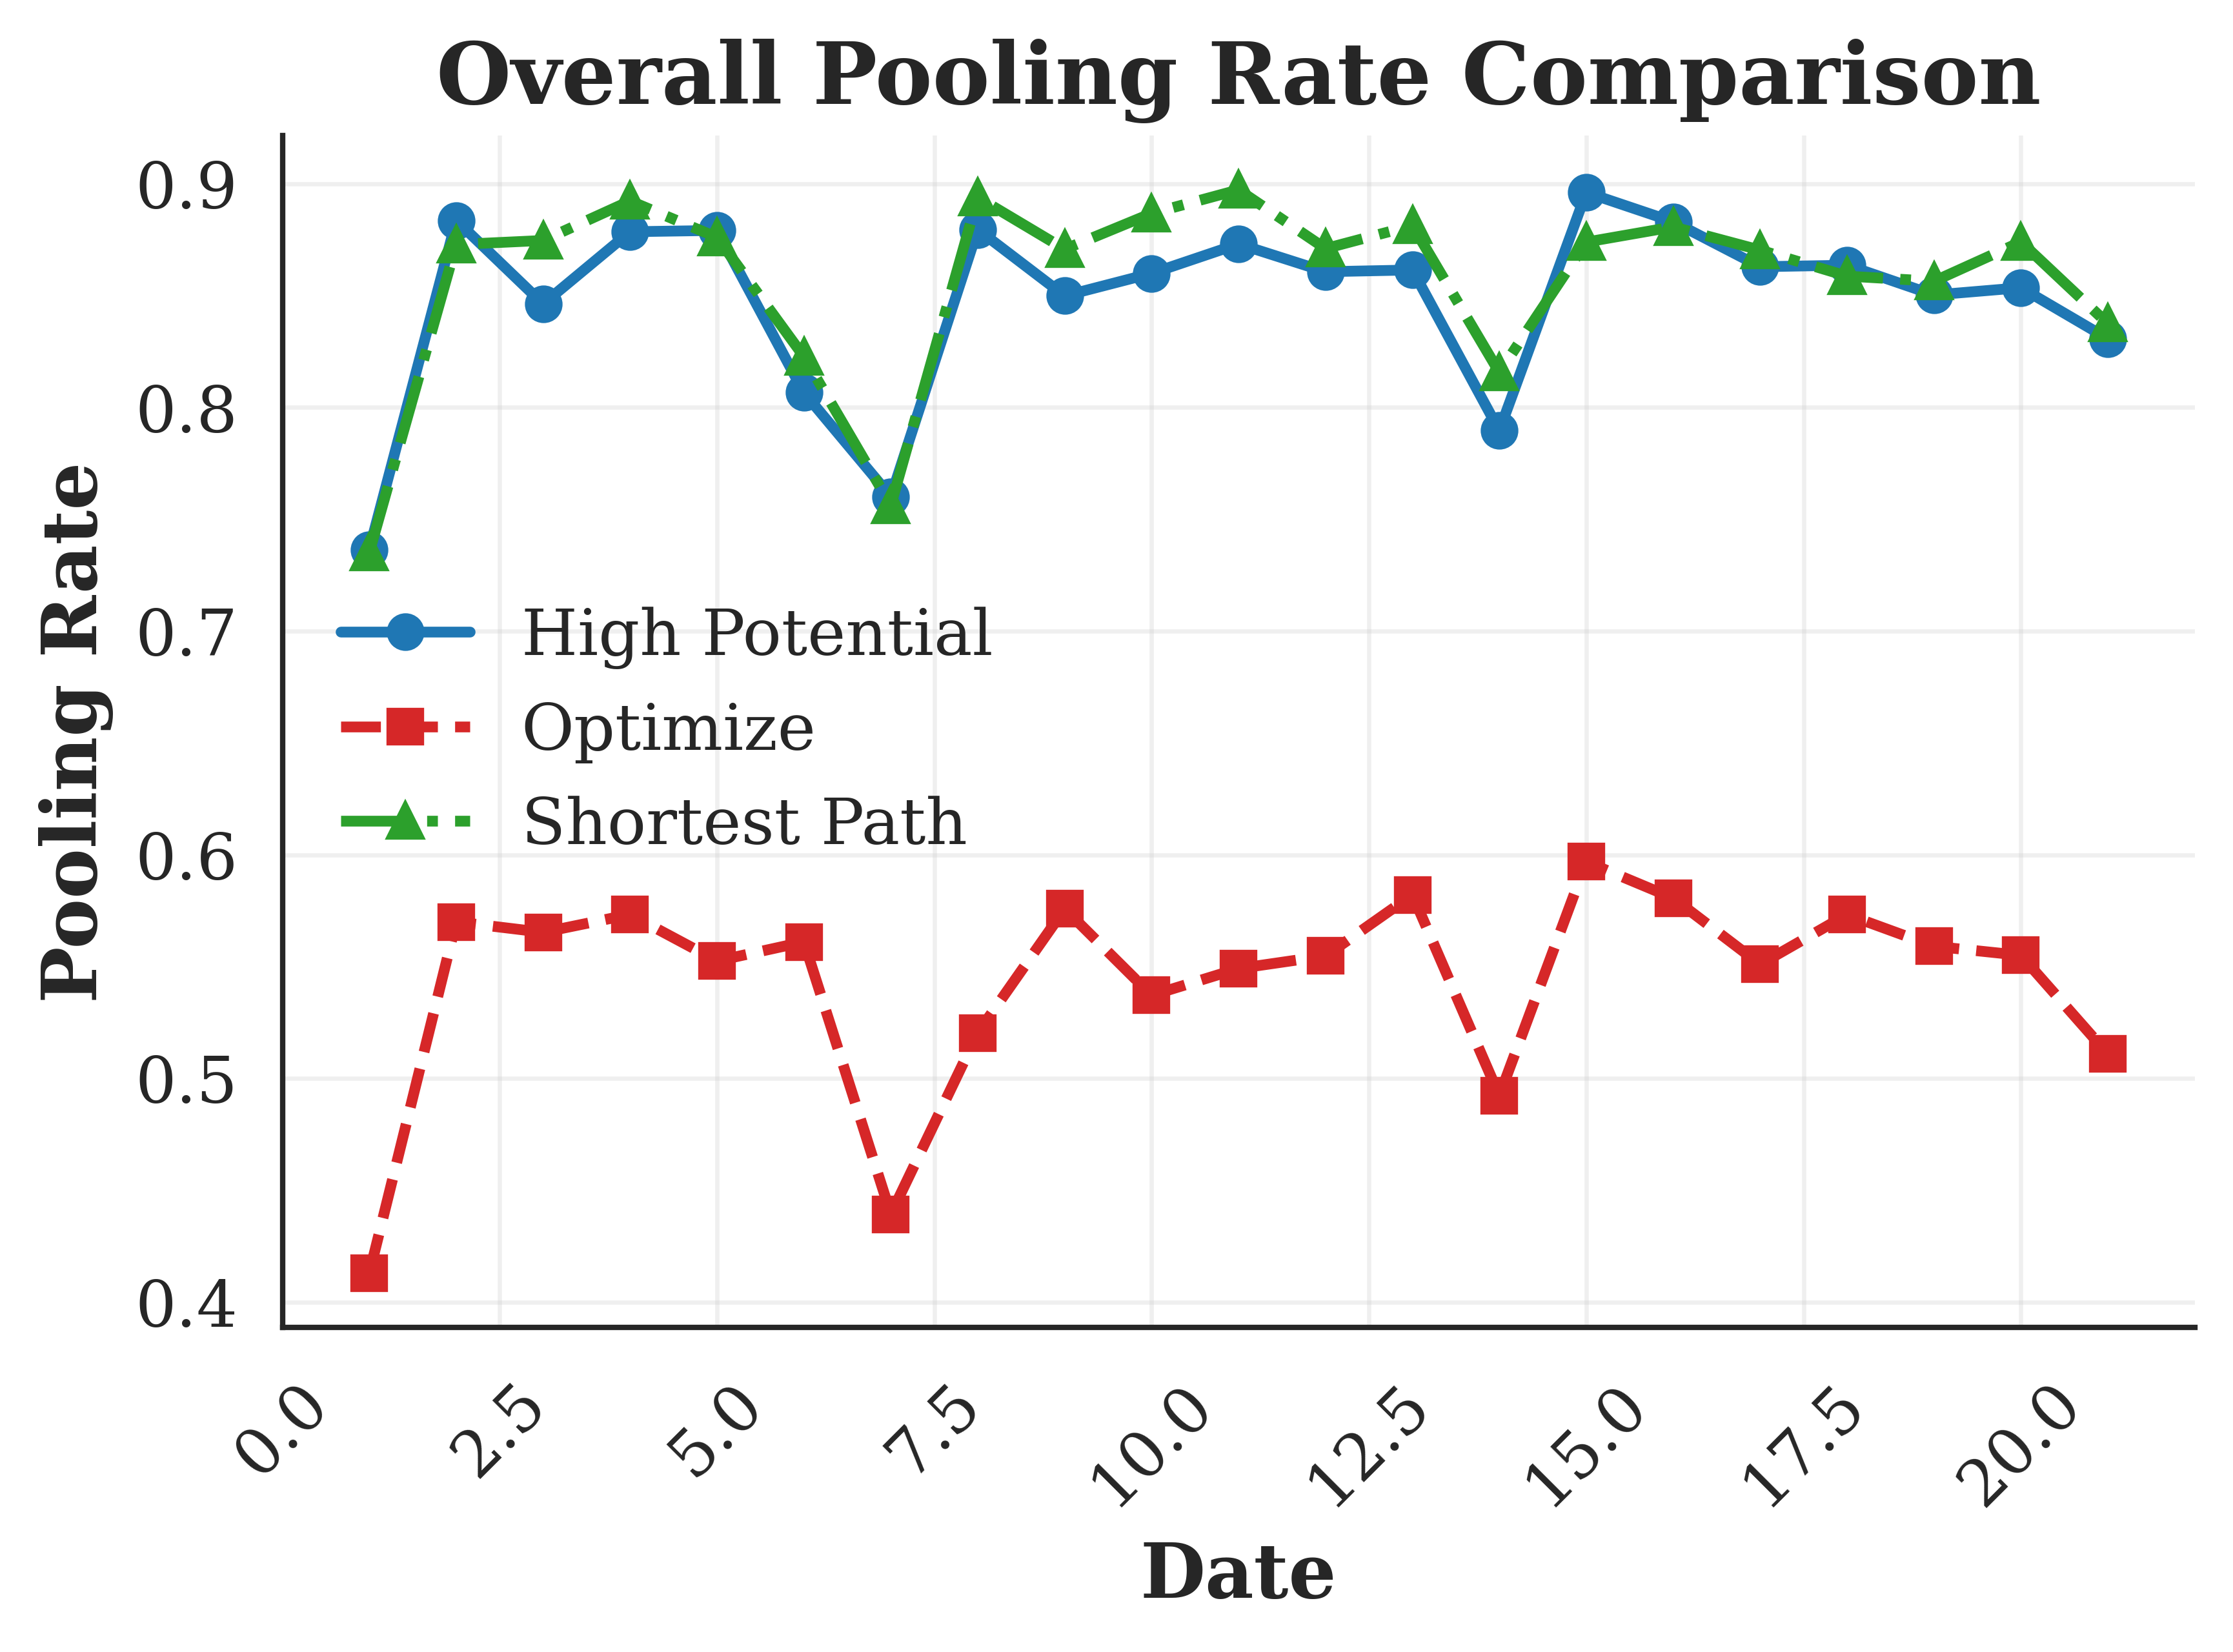

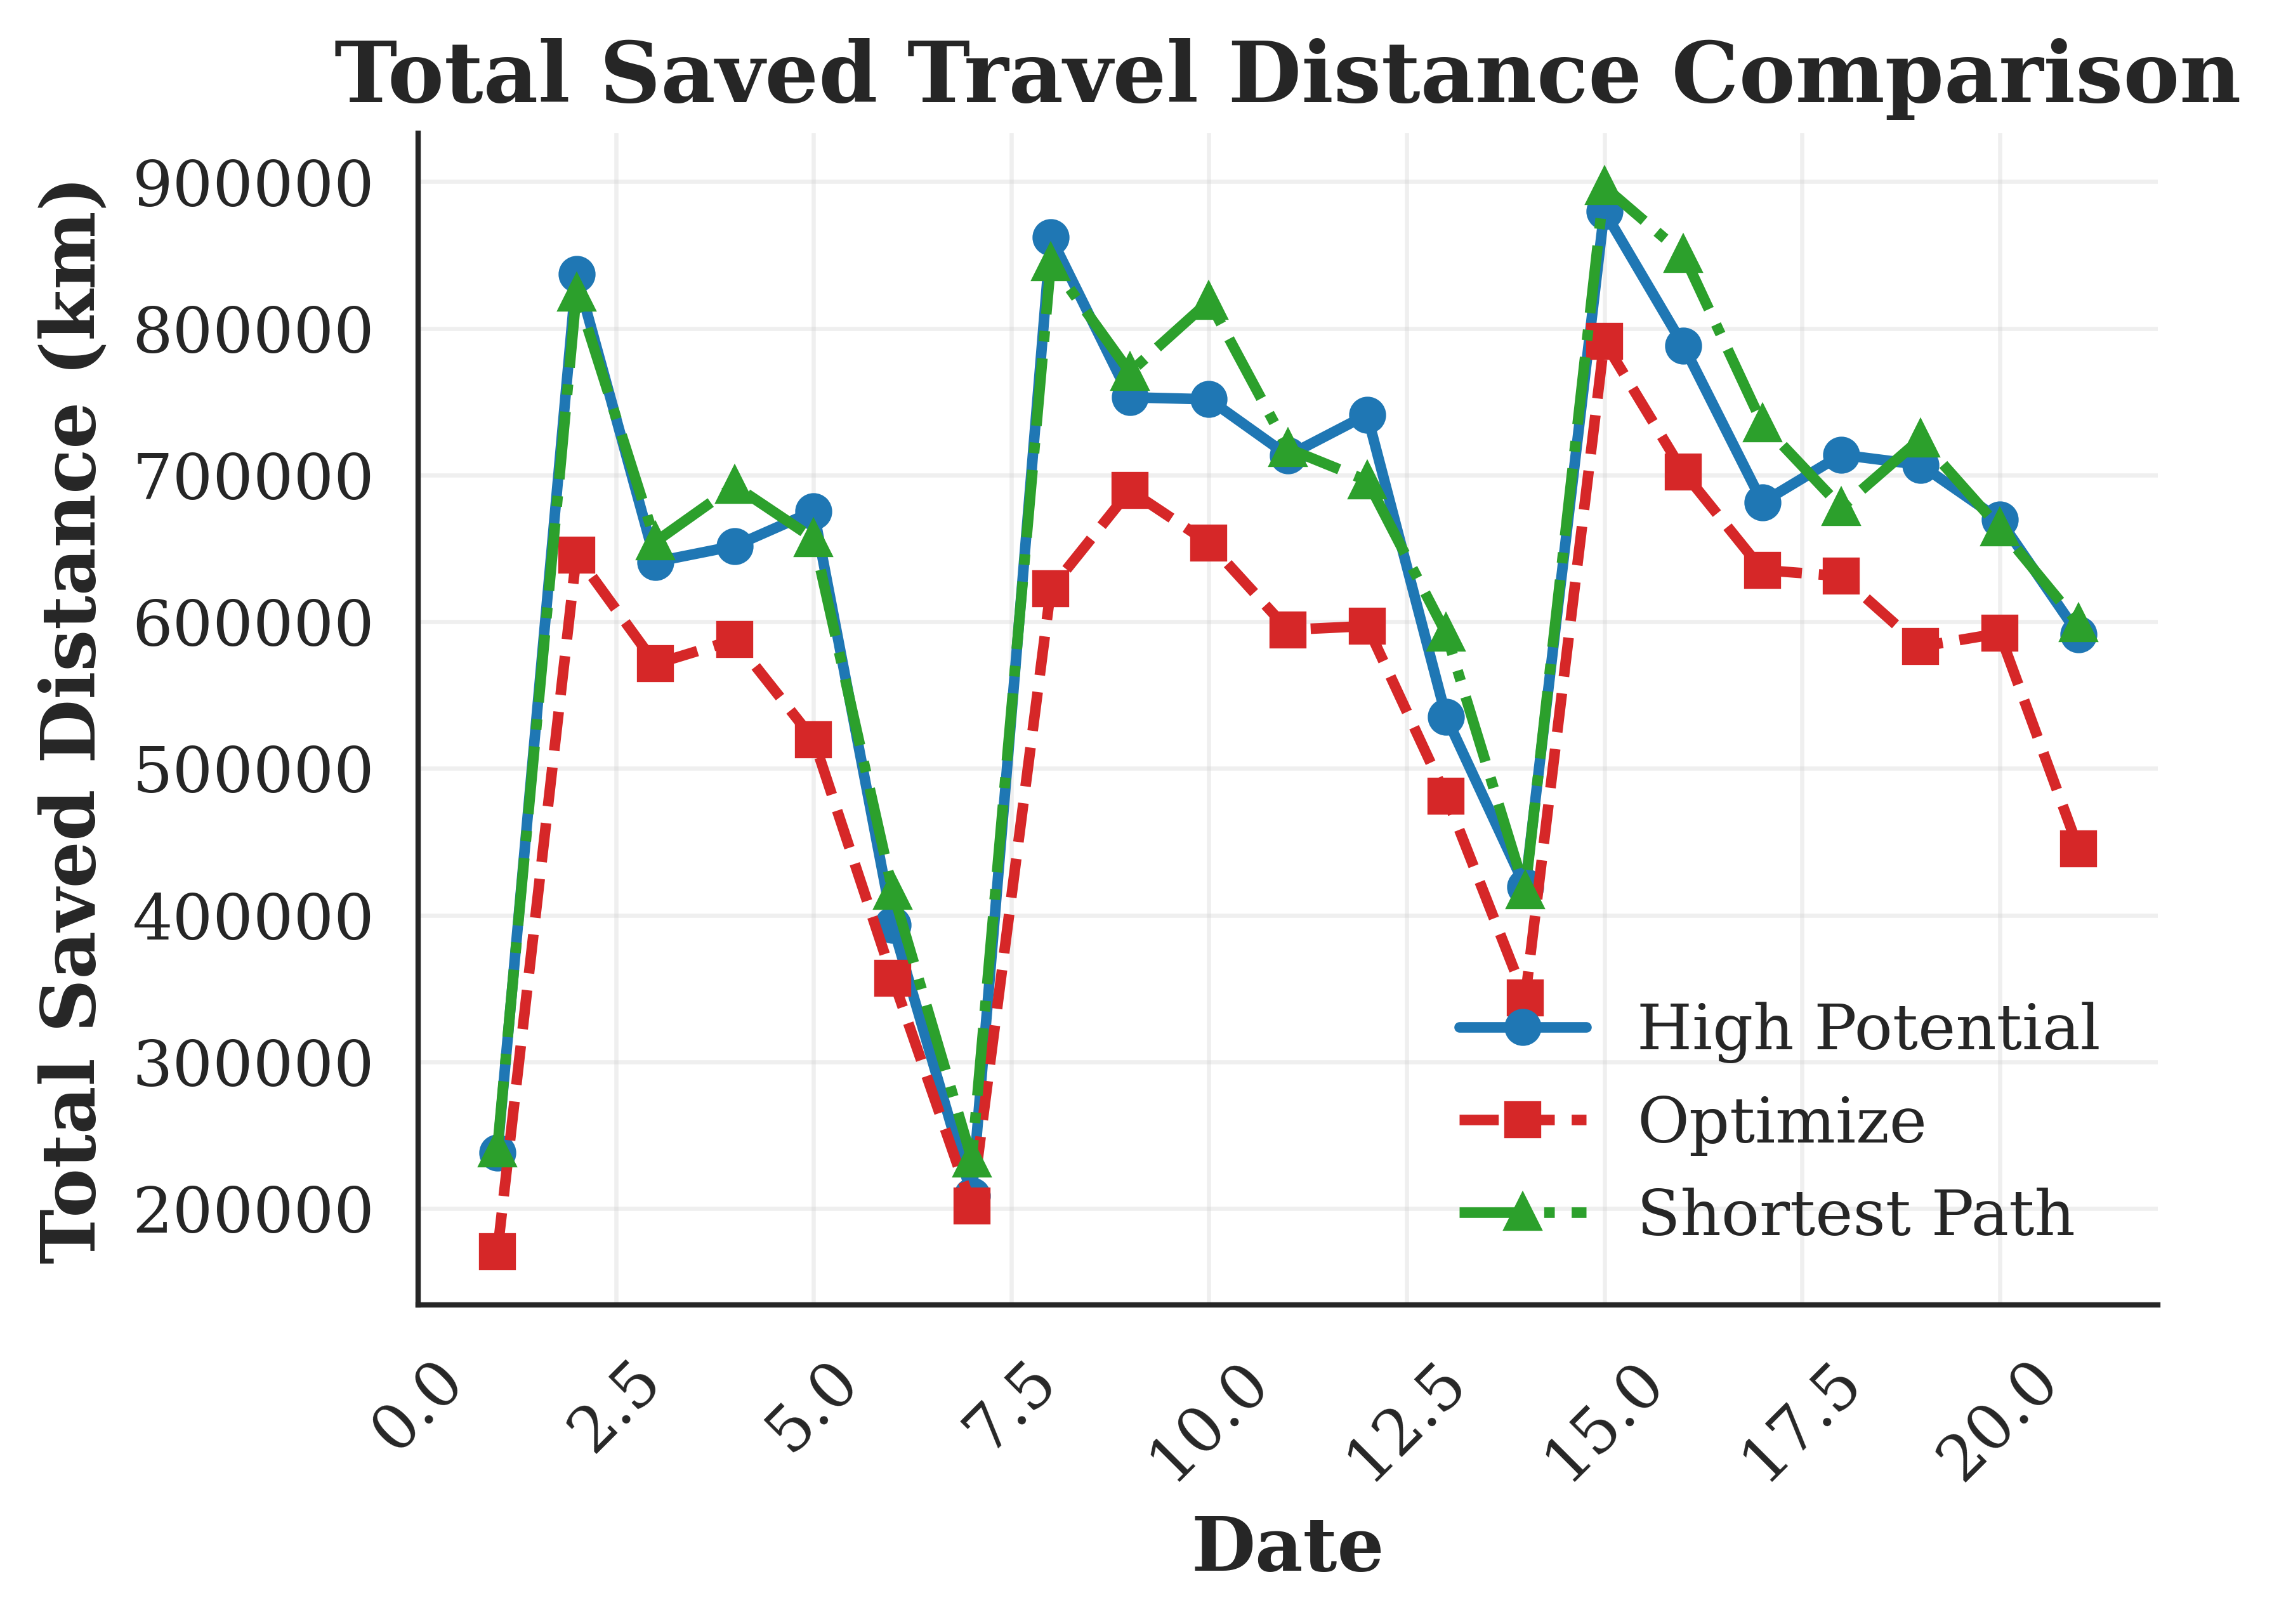

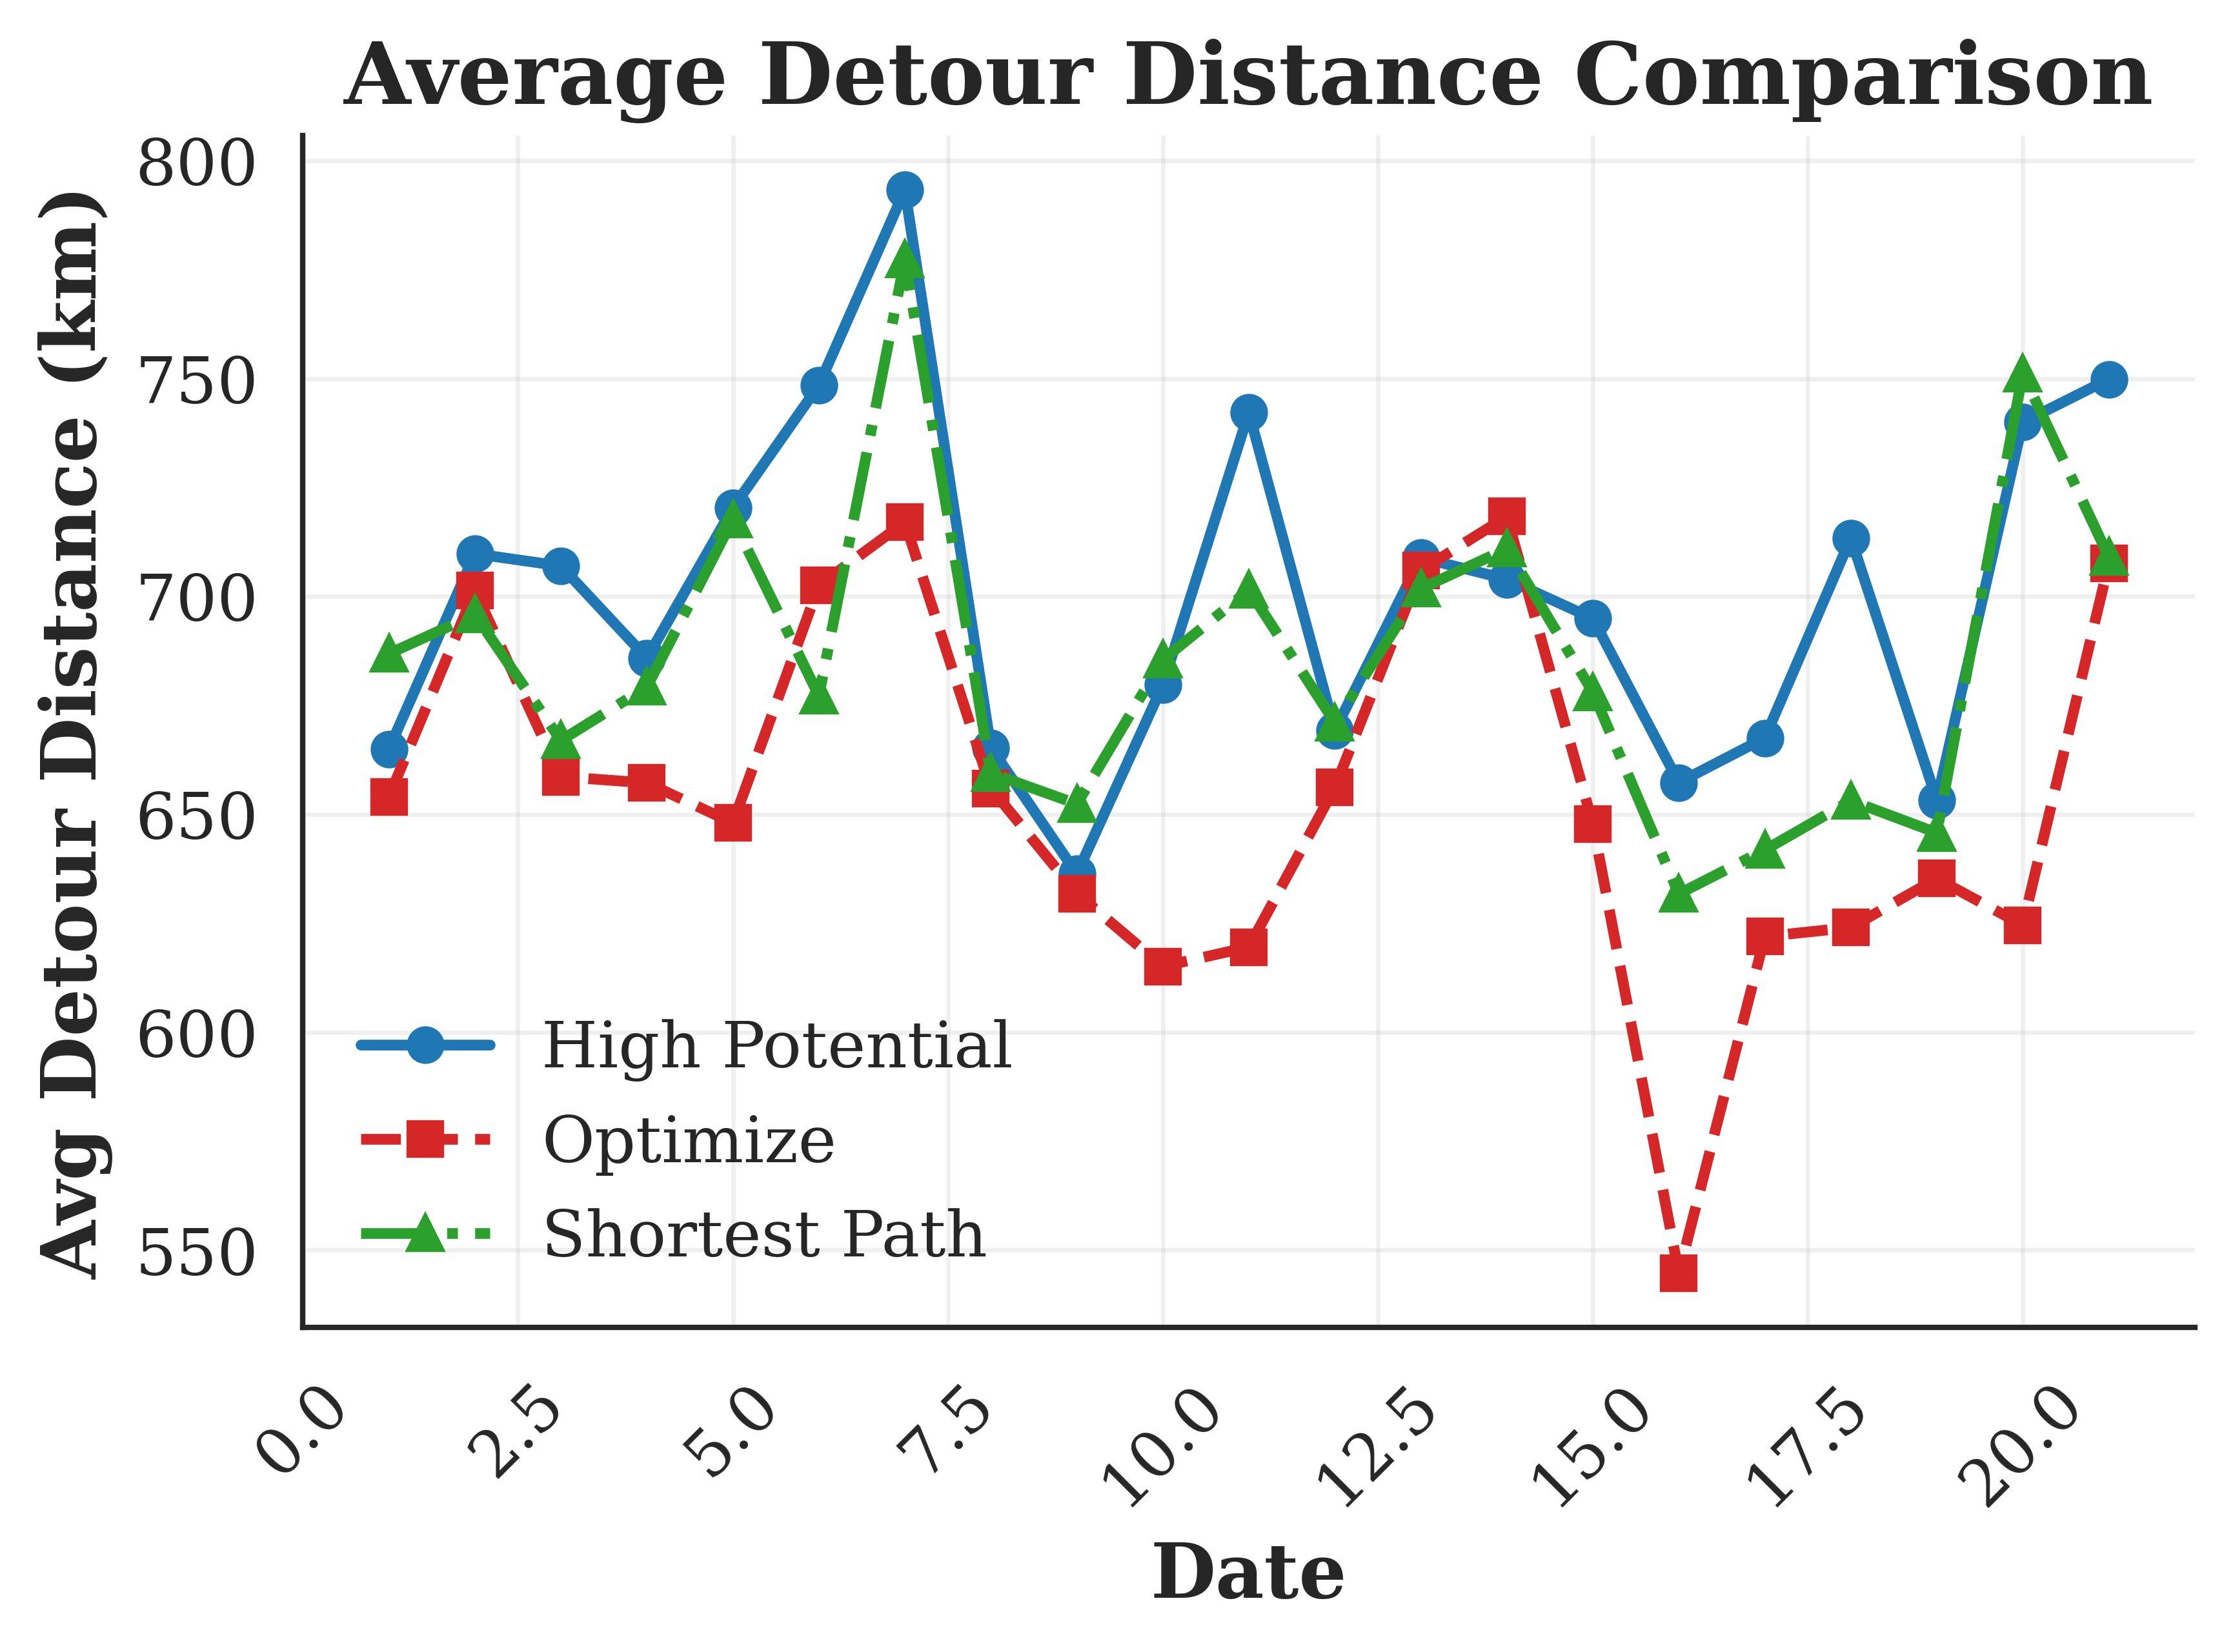

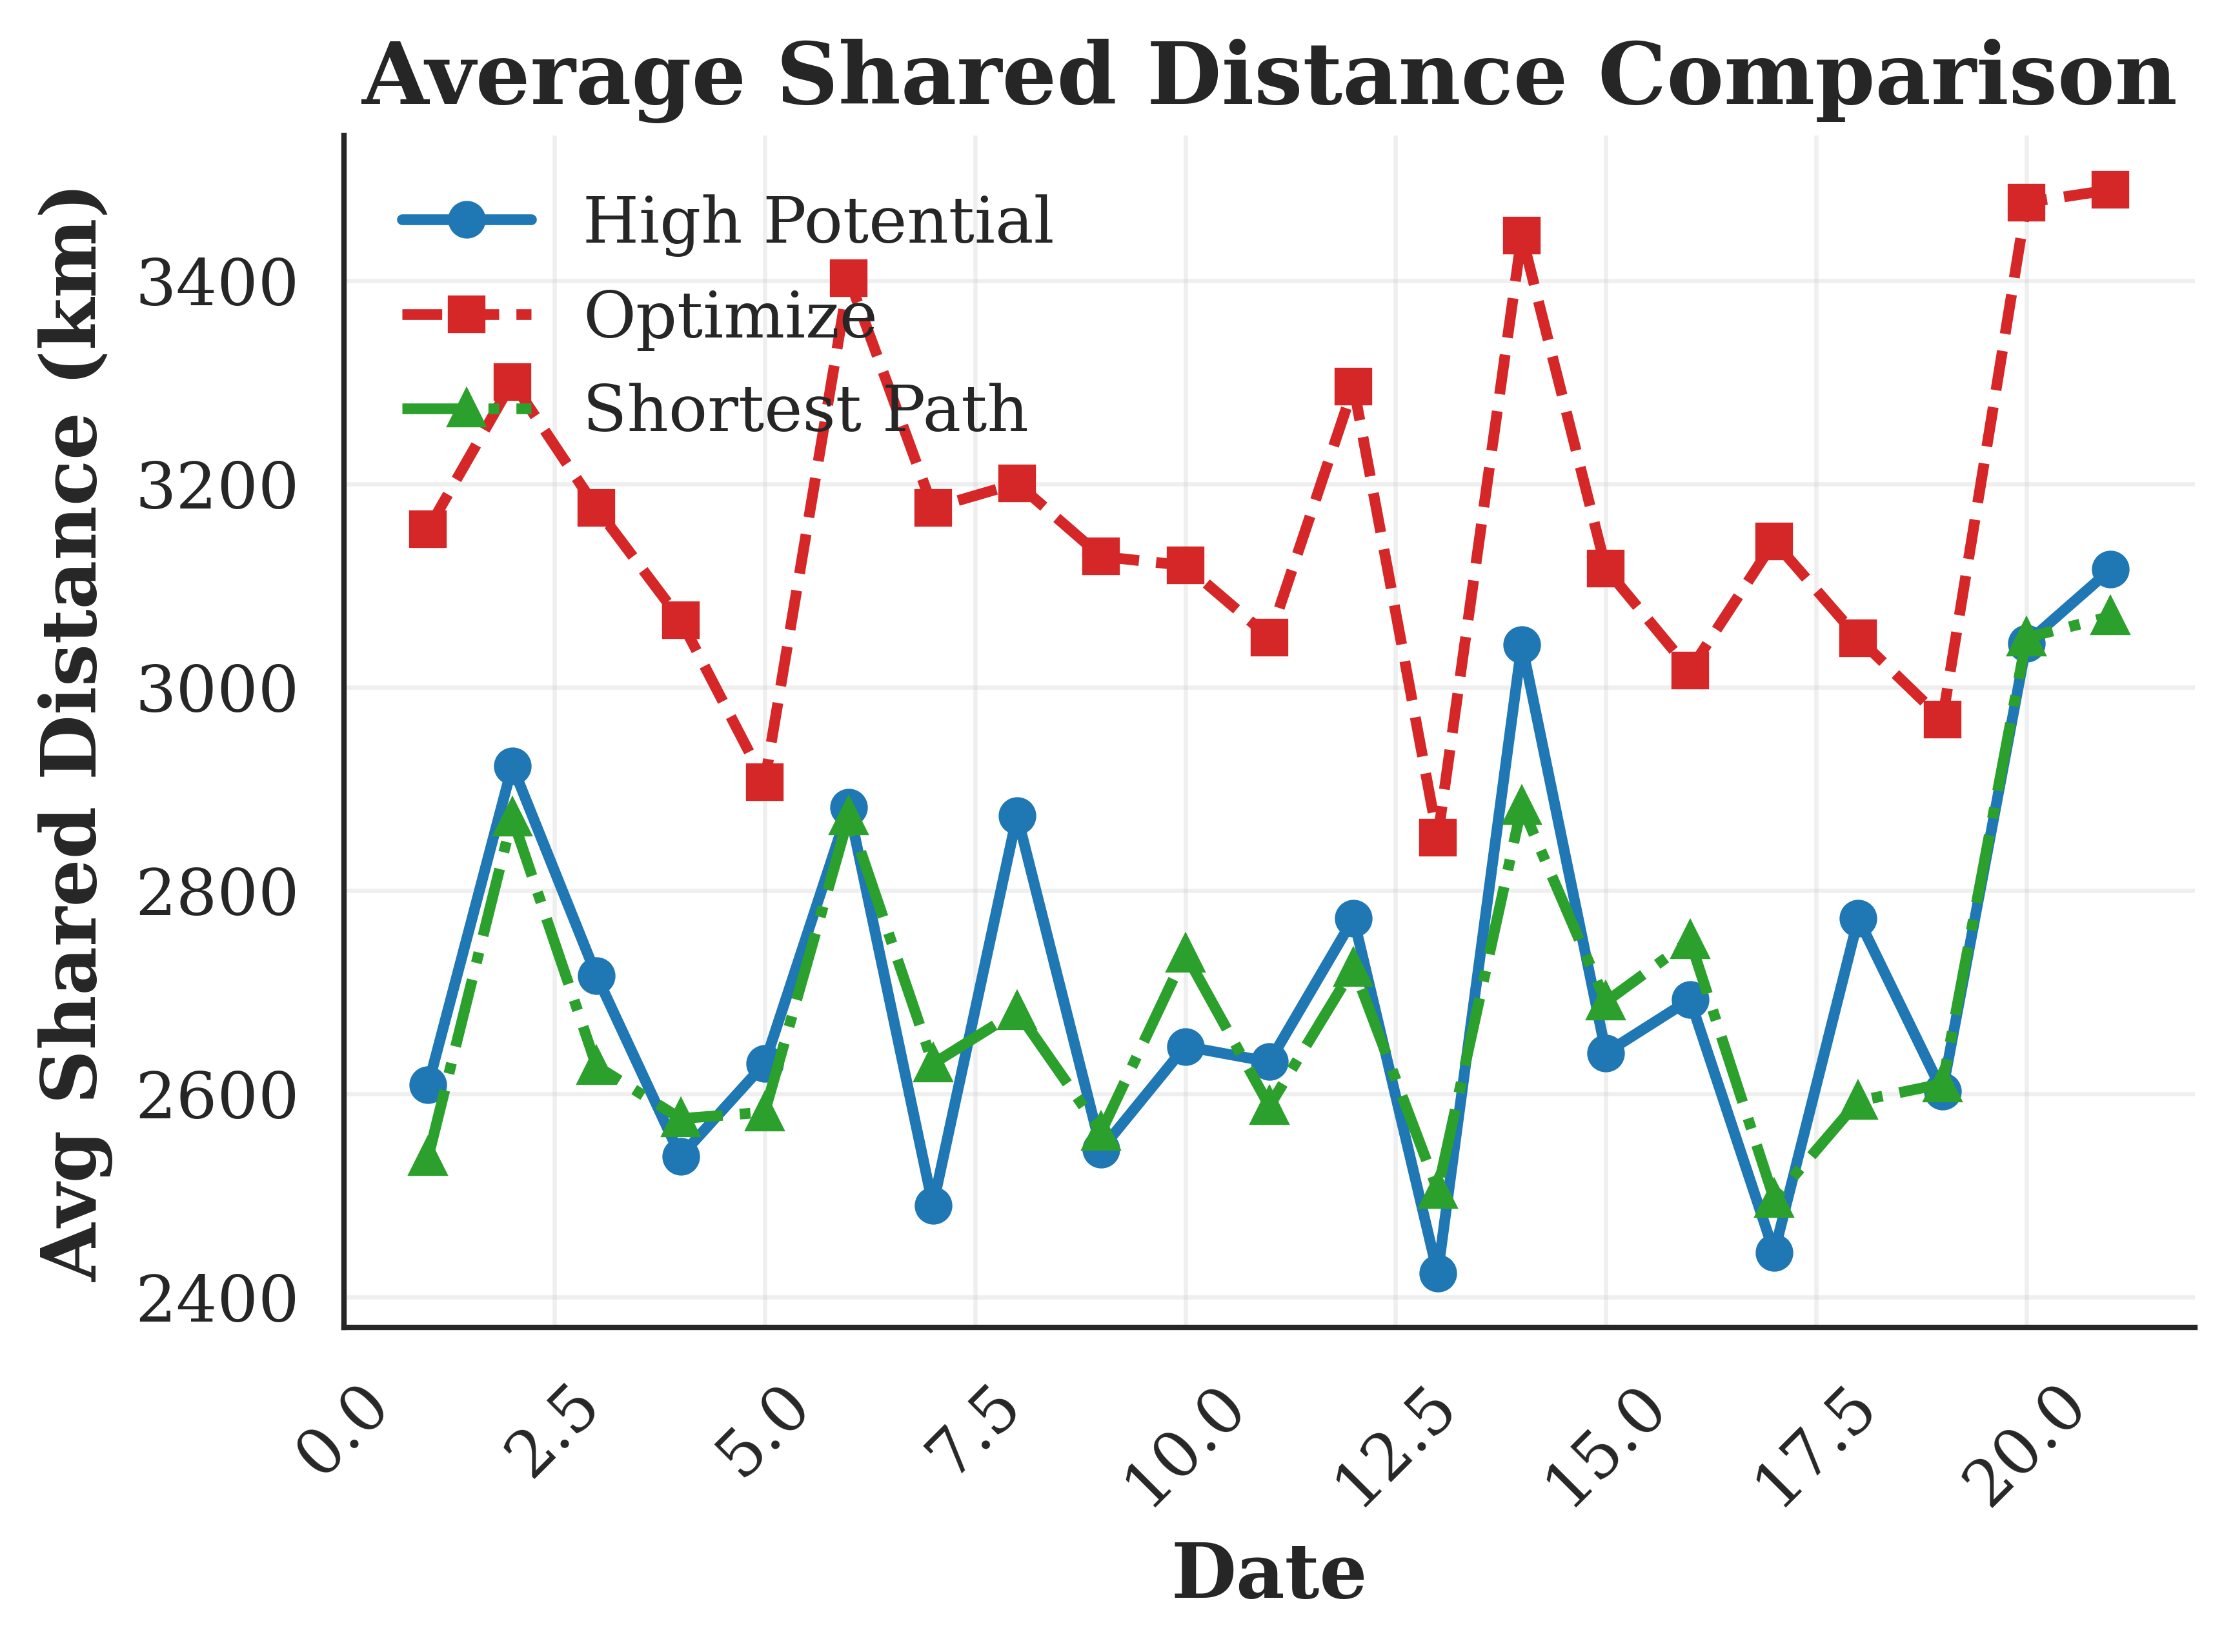

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

# 读取数据
with open('./output/different_date_1_shortest_path_results.pkl', 'rb') as f:
    shortest_path = pickle.load(f)

with open('./output/different_date_optimize_results.pkl', 'rb') as f:
    optimize = pickle.load(f)

with open('./output/different_date_0_shortest_path_results.pkl', 'rb') as f:
    high_potential  = pickle.load(f)
print('shortest_path',shortest_path.keys())


# 存储计算结果
metrics = {
    'date': [],
    'response_rate_hp': [], 'response_rate_opt': [],'response_rate_sho': [],
    'pooling_rate_hp': [], 'pooling_rate_opt': [],'pooling_rate_sho': [],
    'total_saved_distance_hp': [], 'total_saved_distance_opt': [],'total_saved_distance_sho': [],
    'avg_detour_distance_hp': [], 'avg_detour_distance_opt': [],'avg_detour_distance_sho': [],
    'avg_shared_distance_hp': [], 'avg_shared_distance_opt': [],'avg_shared_distance_sho': []
}

# 遍历每个日期
for date in shortest_path.keys():
    # 处理 high_potential
    result_hp = pd.DataFrame.from_dict(high_potential[date], orient='index')
    result_opt = pd.DataFrame.from_dict(optimize[date], orient='index')
    result_sho = pd.DataFrame.from_dict(shortest_path[date], orient='index')


    def compute_metrics(result):
        response_rate = result["responded_order_num"].sum() / result["his_order_num"].sum()
        pooling_rate = result["pooled_order_num"].sum() / result["responded_order_num"].replace(0, np.nan).sum()
        avg_detour_distance = np.mean([item for sublist in result["detour_distance"] for item in sublist])
        avg_shared_distance = np.mean([item for sublist in result["shared_distance"] for item in sublist])
        total_saved_distance = np.sum([item for sublist in result["saved_travel_distance"] for item in sublist])
        return response_rate, pooling_rate, avg_detour_distance, avg_shared_distance, total_saved_distance

    metrics['date'].append(date)
    hp_metrics = compute_metrics(result_hp)
    opt_metrics = compute_metrics(result_opt)
    sho_metrics = compute_metrics(result_sho)

    metrics['response_rate_hp'].append(hp_metrics[0])
    metrics['response_rate_opt'].append(opt_metrics[0])
    metrics['response_rate_sho'].append(sho_metrics[0])

    metrics['pooling_rate_hp'].append(hp_metrics[1])
    metrics['pooling_rate_opt'].append(opt_metrics[1])
    metrics['pooling_rate_sho'].append(sho_metrics[1])

    metrics['total_saved_distance_hp'].append(hp_metrics[4])
    metrics['total_saved_distance_opt'].append(opt_metrics[4])
    metrics['total_saved_distance_sho'].append(sho_metrics[4])

    metrics['avg_detour_distance_hp'].append(hp_metrics[2])
    metrics['avg_detour_distance_opt'].append(opt_metrics[2])
    metrics['avg_detour_distance_sho'].append(sho_metrics[2])

    metrics['avg_shared_distance_hp'].append(hp_metrics[3])
    metrics['avg_shared_distance_opt'].append(opt_metrics[3])
    metrics['avg_shared_distance_sho'].append(sho_metrics[3])

# 转换为 DataFrame
df = pd.DataFrame(metrics)
# 先转换日期格式，按时间排序
df['date'] = pd.to_datetime(df['date'])  # 转换为 datetime 格式
df = df.sort_values(by='date')  # 按日期升序排序
df['date'] = df['date'].dt.strftime('%Y-%m-%d')  # 转回字符串格式，避免影响 x 轴显示

# 设置 SCI 论文风格
sns.set(style="white", context="paper", font_scale=1.5, rc={"font.family": "serif"})
# 颜色方案（适合SCI论文 & 黑白打印）
colors = ["#1f77b4", "#d62728", "#2ca02c"]  # 分别代表 high_potential, optimize, new_data

# 定义通用绘图函数
def plot_comparison(x, y1, y2, y3, ylabel, title, filename):
    fig, ax = plt.subplots(figsize=(6, 4.5), dpi=600)

    ax.plot(x, y1, marker='o', color=colors[0], markersize=6, linestyle='-', linewidth=2, label='High Potential')
    ax.plot(x, y2, marker='s', color=colors[1], markersize=6, linestyle='--', linewidth=2, label='Optimize')
    ax.plot(x, y3, marker='^', color=colors[2], markersize=6, linestyle='-.', linewidth=2, label='Shortest Path')

    ax.set_xlabel("Date", fontsize=14, fontweight='bold')
    ax.set_ylabel(ylabel, fontsize=14, fontweight='bold')
    ax.set_title(title, fontsize=16, fontweight='bold')

    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.grid(alpha=0.3)  # 轻微网格线
    ax.legend(fontsize=12, frameon=False)  # 隐藏图例框
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    plt.xticks(rotation=45)  # 避免日期重叠
    plt.tight_layout()
    plt.savefig('./figure/'+filename, dpi=600, bbox_inches='tight', transparent=True)
    plt.show()

date = [i for i in range(1,22)]
# **绘制三组数据的对比图**
plot_comparison(date, df['response_rate_hp'], df['response_rate_opt'], df['response_rate_sho'], 
                "Response Rate", "Overall Response Rate Comparison", "different_date_response_rate.png")

plot_comparison(date, df['pooling_rate_hp'], df['pooling_rate_opt'], df['pooling_rate_sho'], 
                "Pooling Rate", "Overall Pooling Rate Comparison", "different_date_pooling_rate.png")

plot_comparison(date, df['total_saved_distance_hp'], df['total_saved_distance_opt'], df['total_saved_distance_sho'], 
                "Total Saved Distance (km)", "Total Saved Travel Distance Comparison", "different_date_total_saved_distance.png")

plot_comparison(date, df['avg_detour_distance_hp'], df['avg_detour_distance_opt'], df['avg_detour_distance_sho'], 
                "Avg Detour Distance (km)", "Average Detour Distance Comparison", "different_date_avg_detour_distance.png")

plot_comparison(date, df['avg_shared_distance_hp'], df['avg_shared_distance_opt'], df['avg_shared_distance_sho'], 
                "Avg Shared Distance (km)", "Average Shared Distance Comparison", "different_date_avg_shared_distance.png")


## method 1 randomness

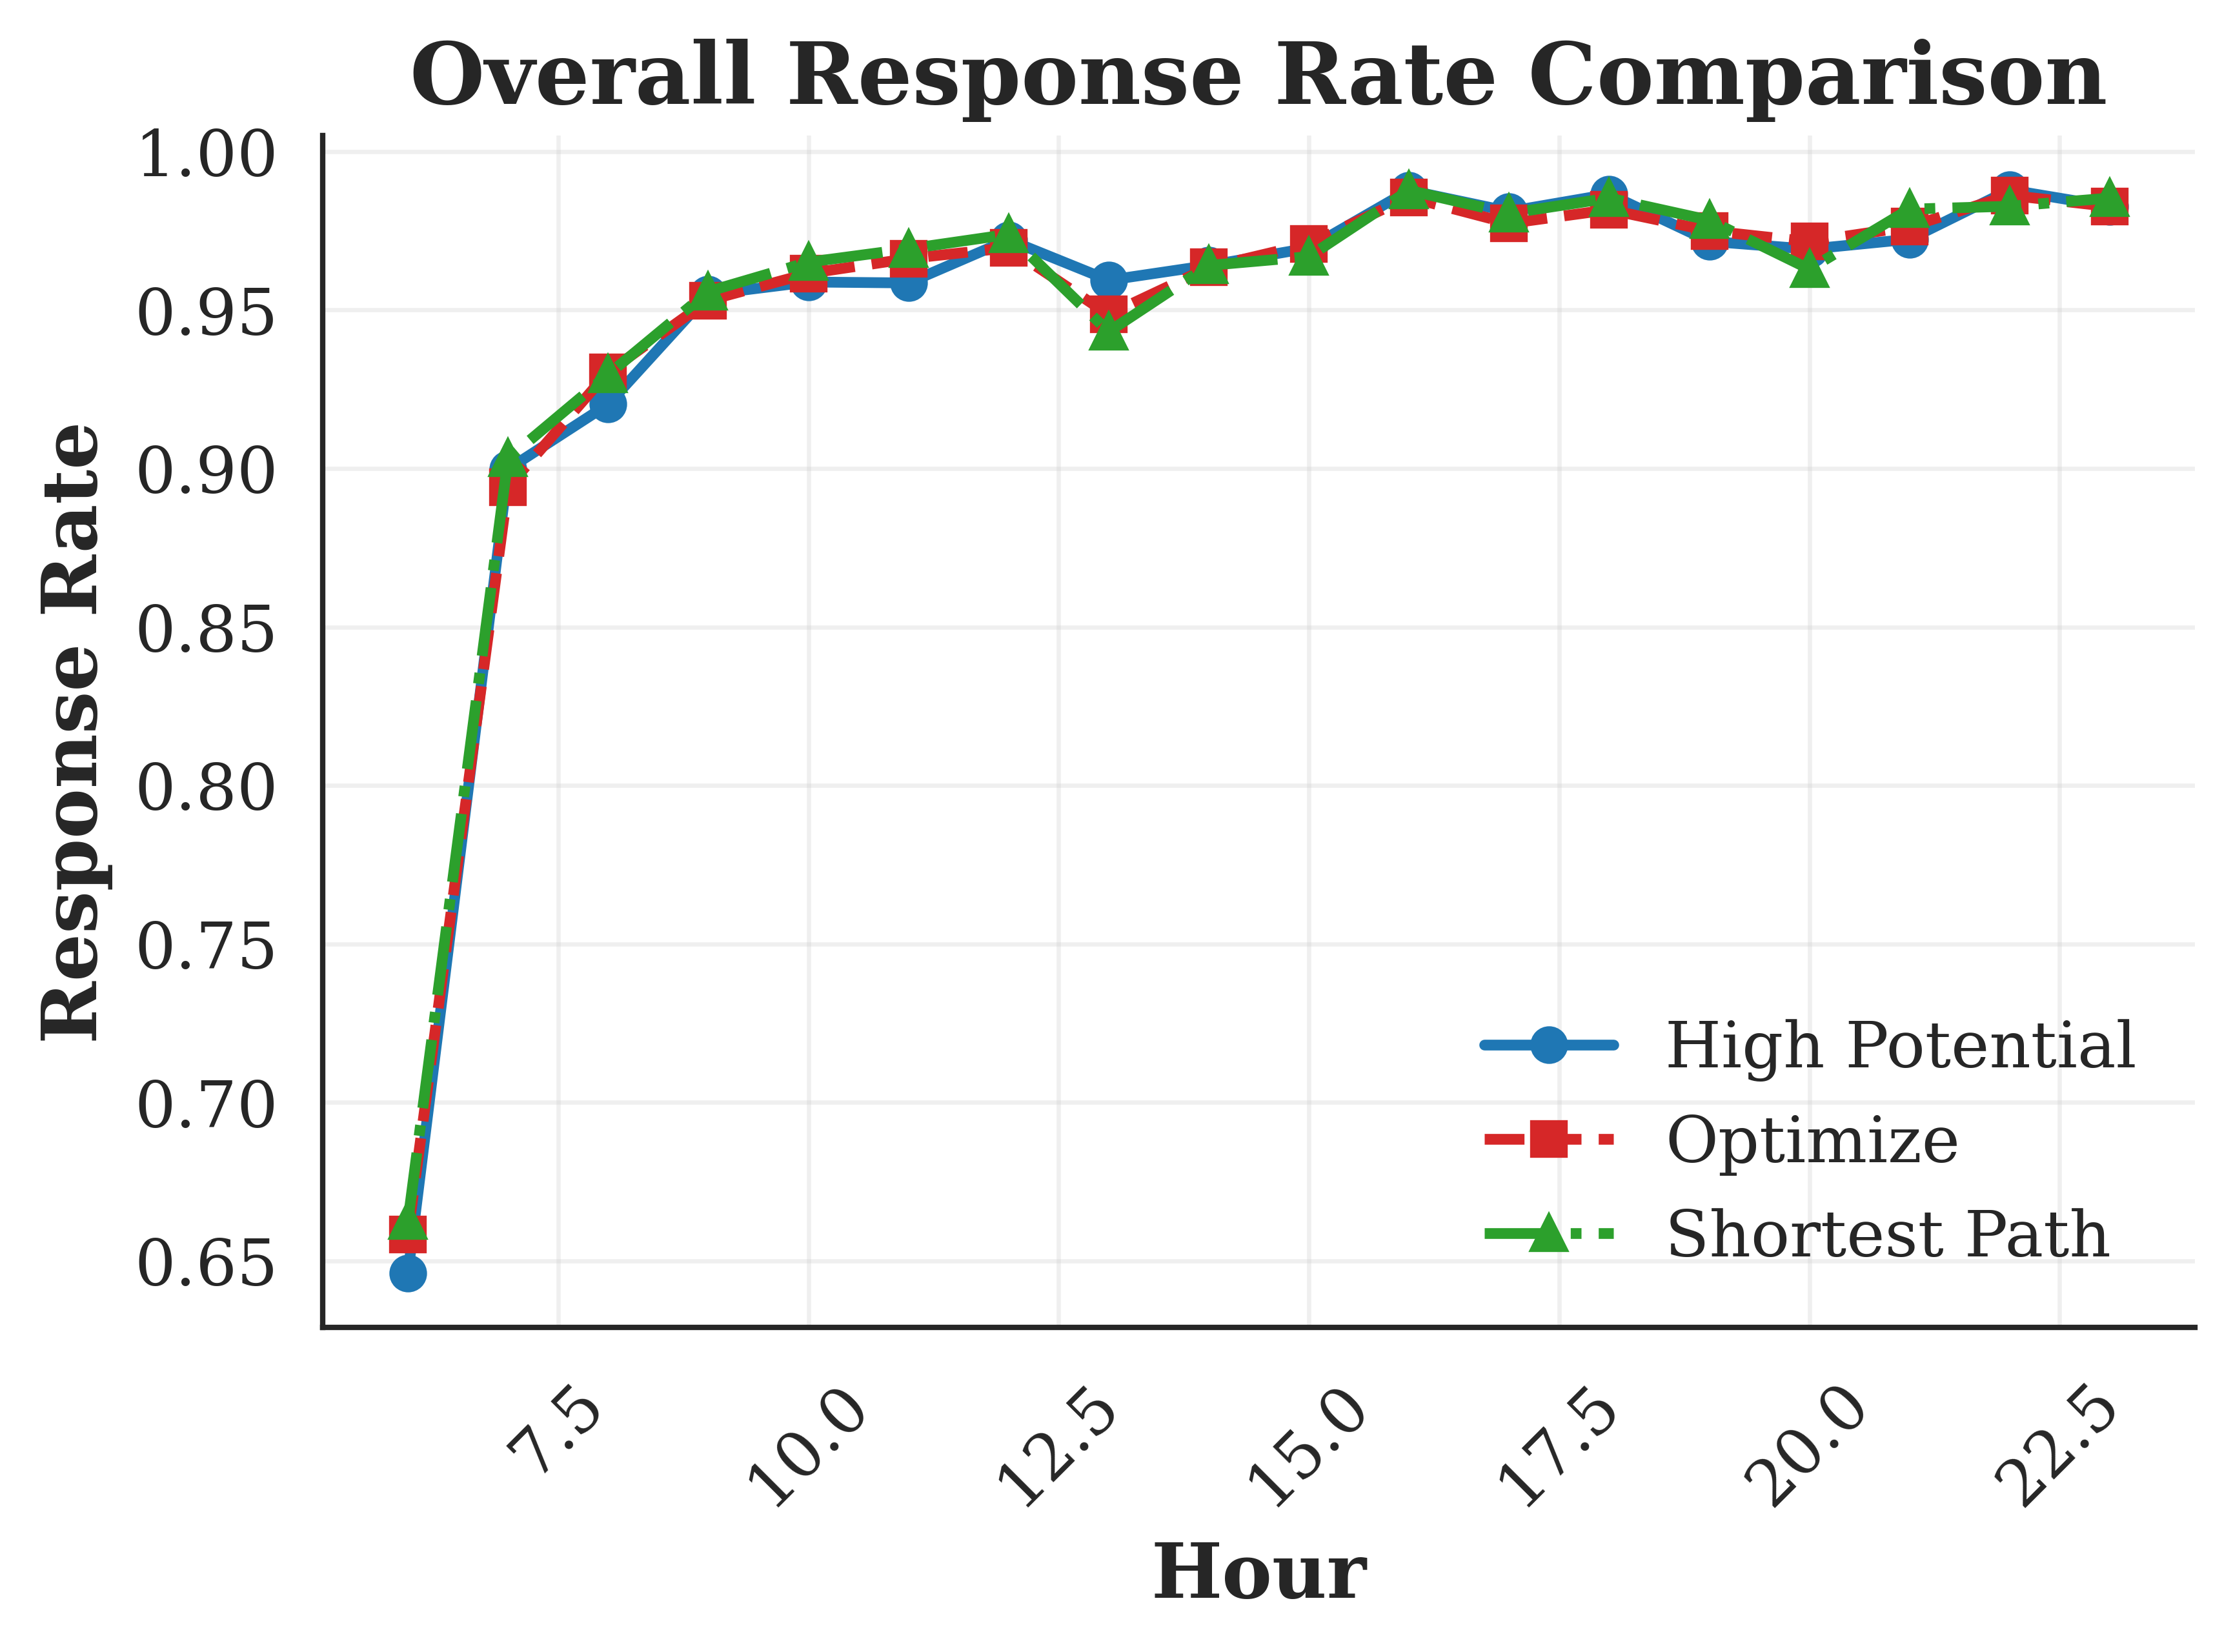

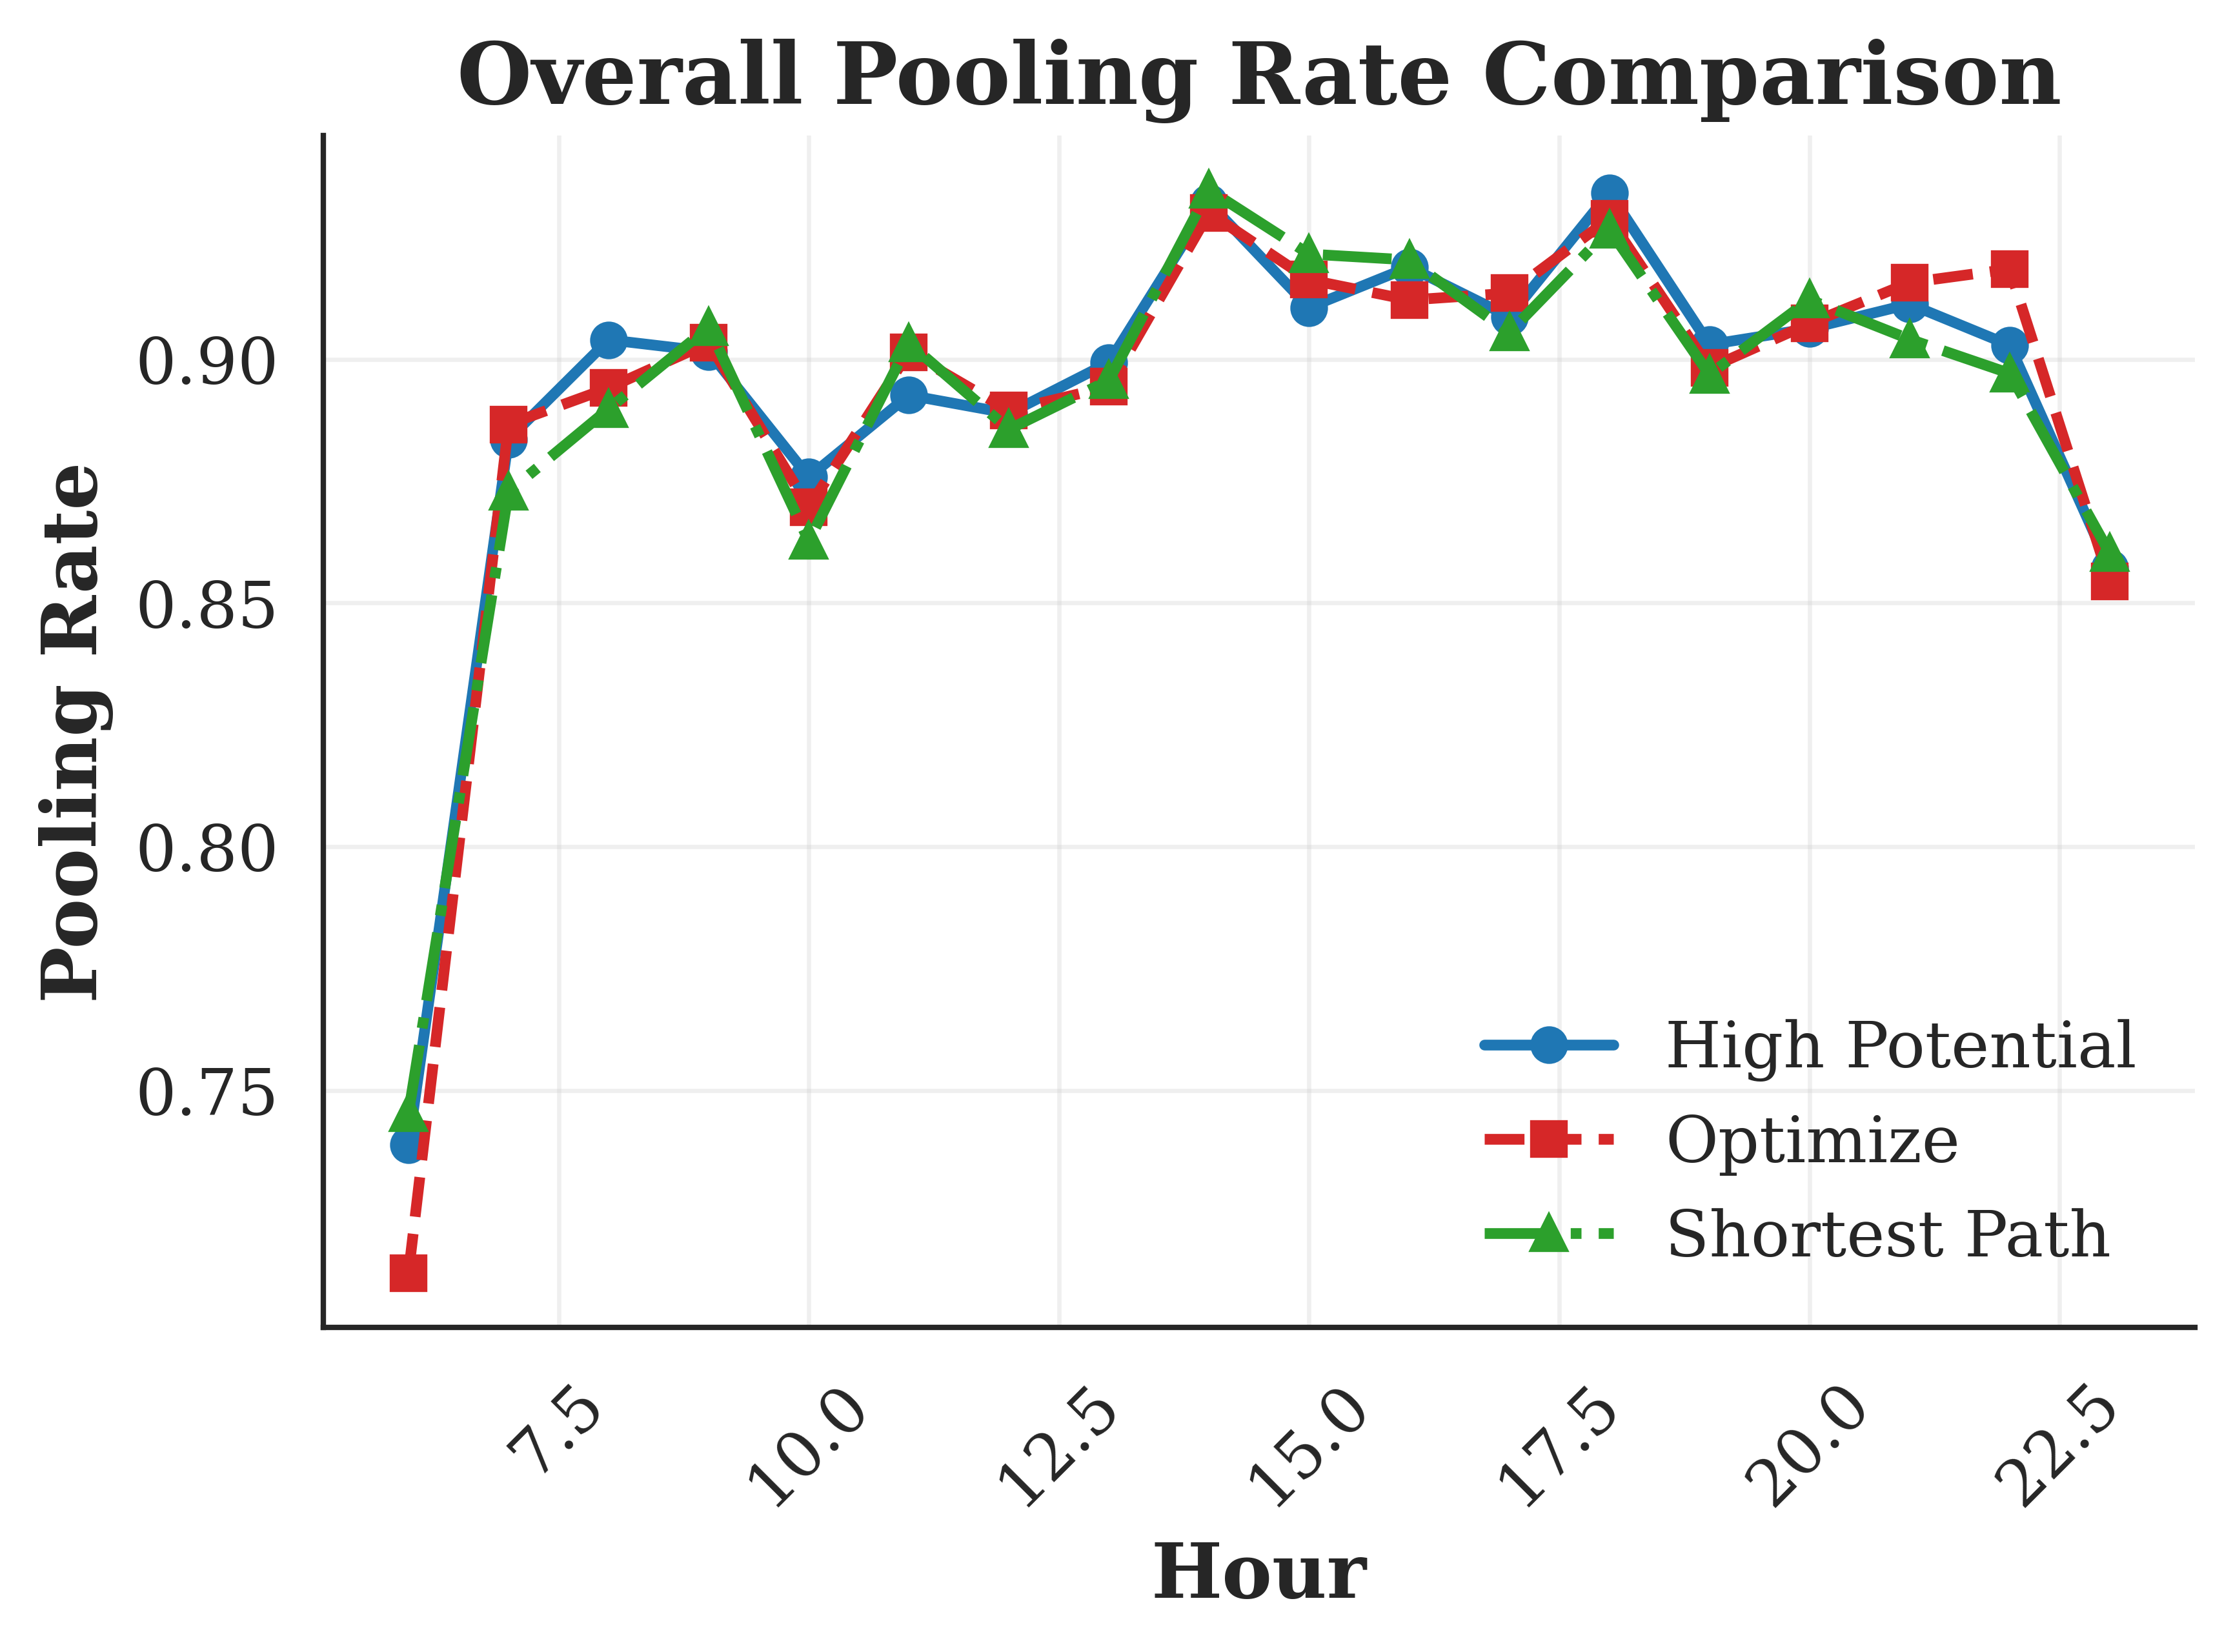

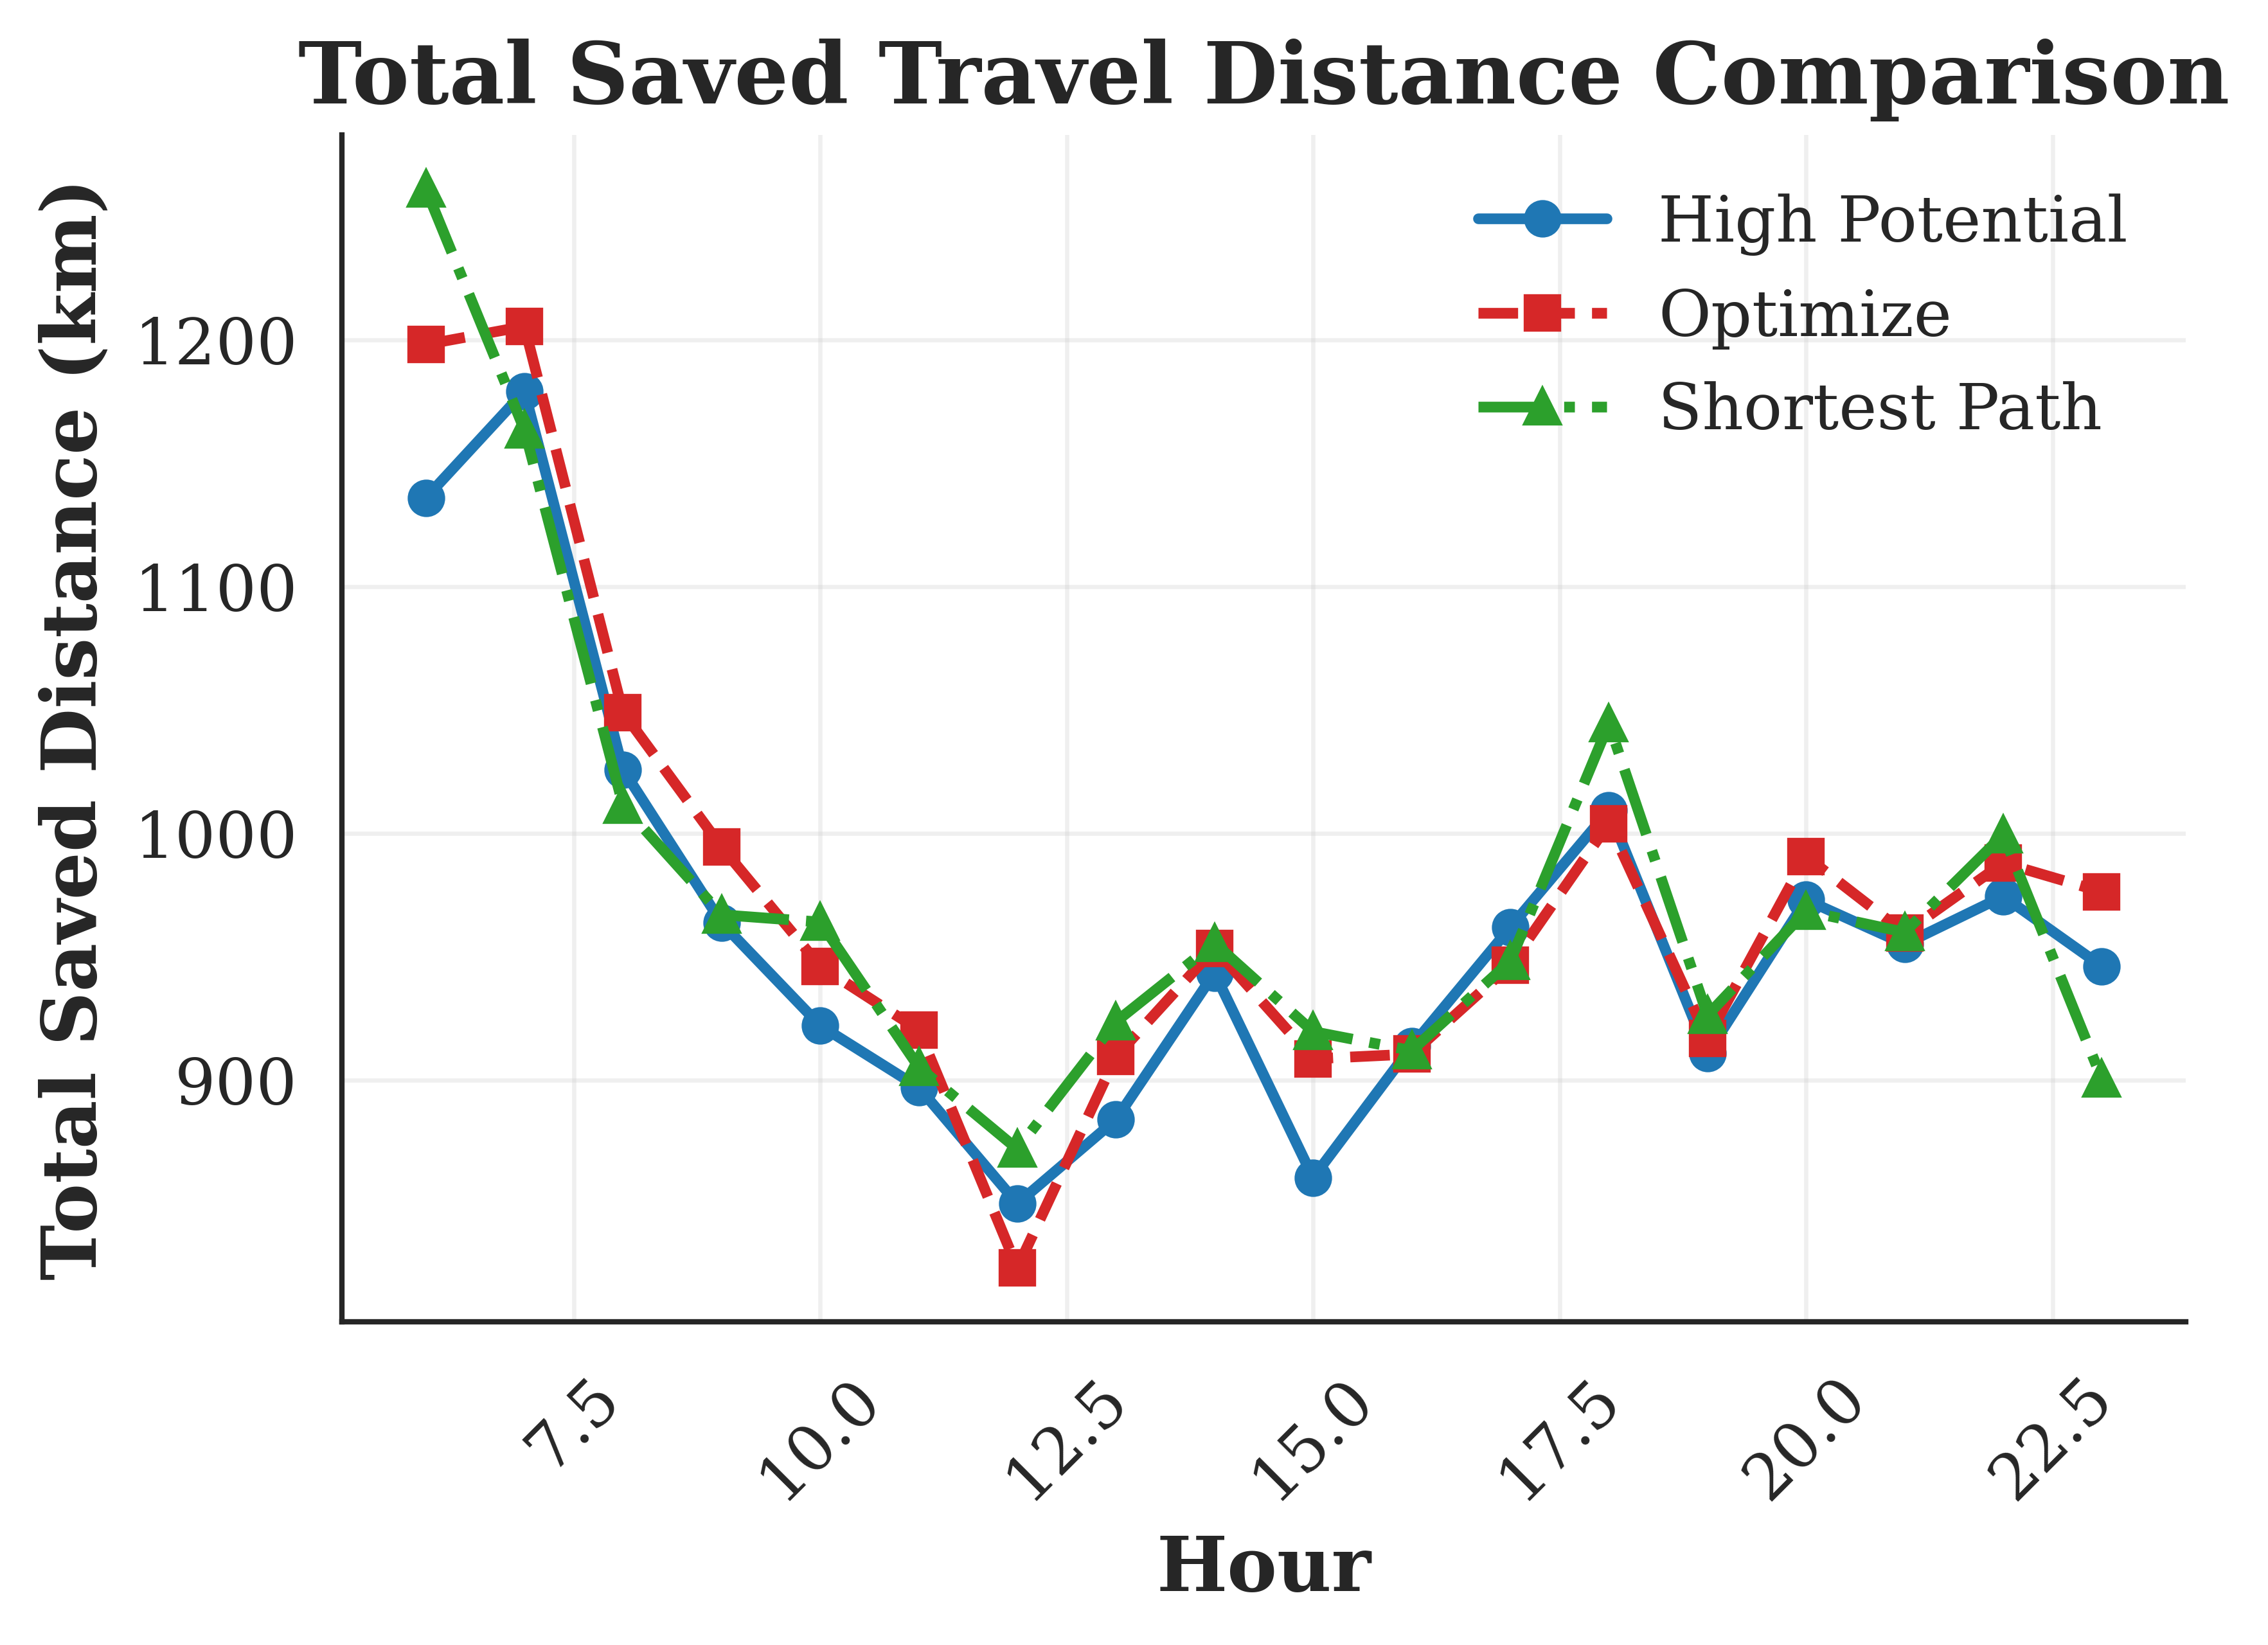

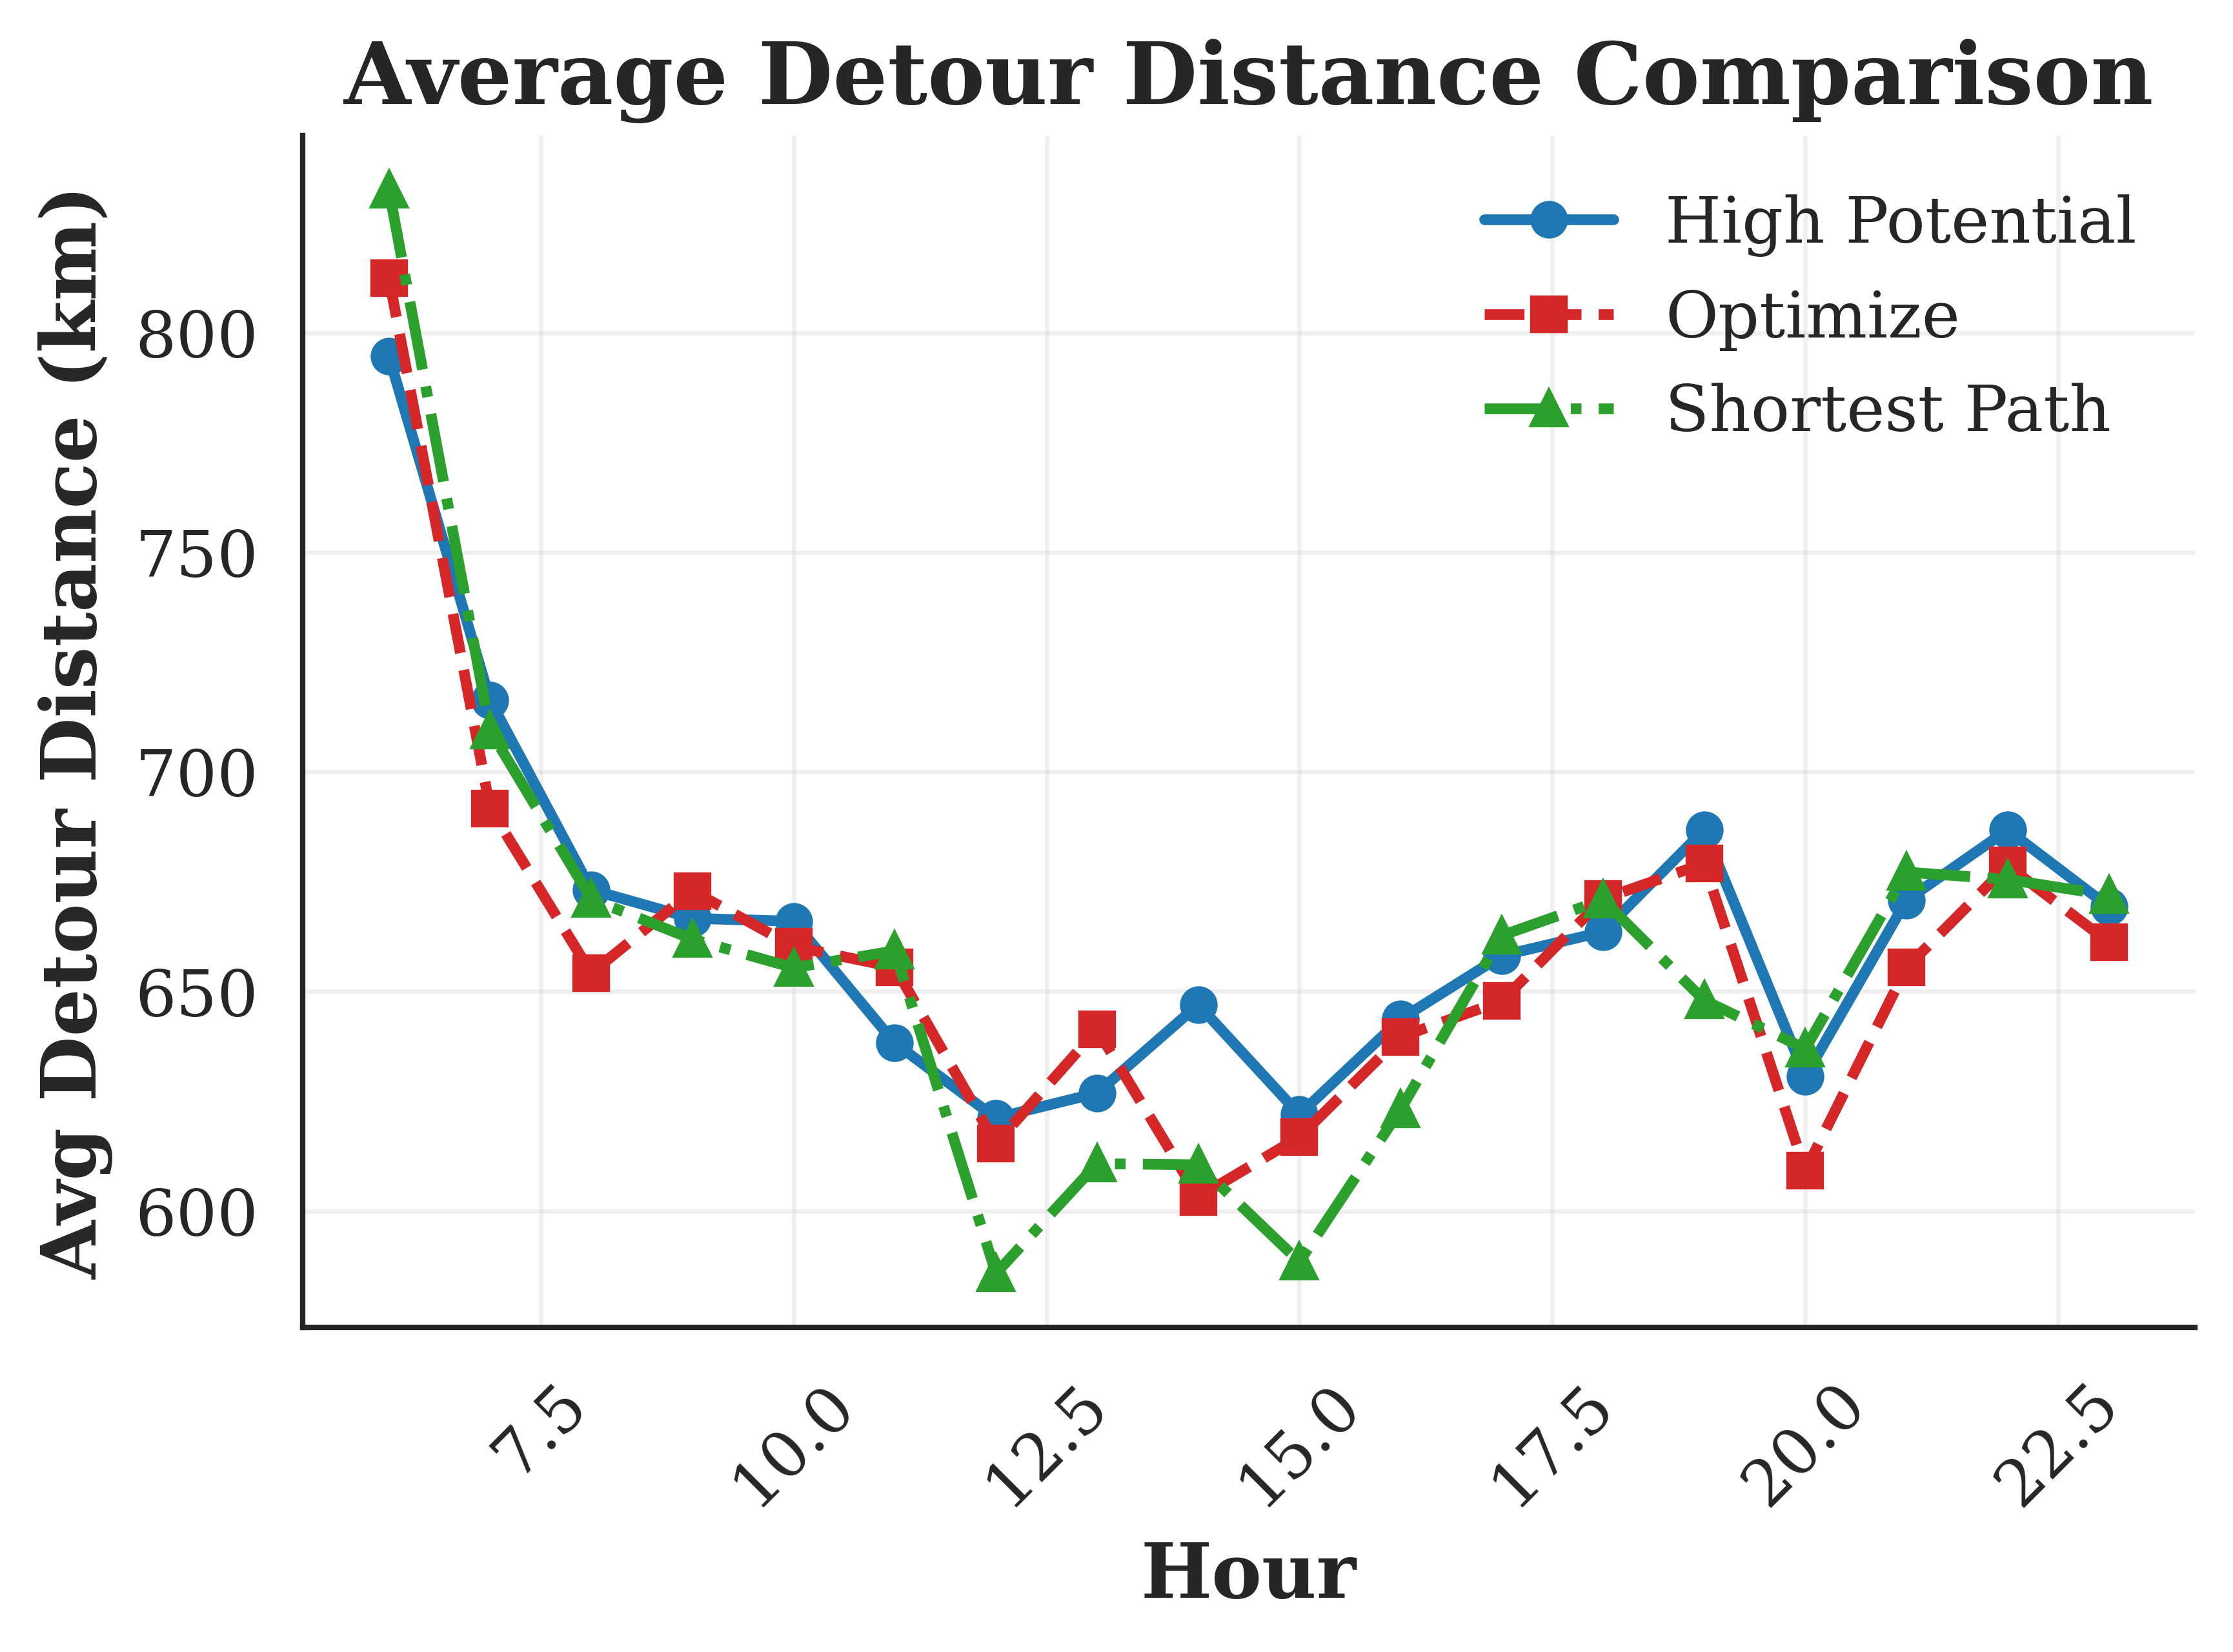

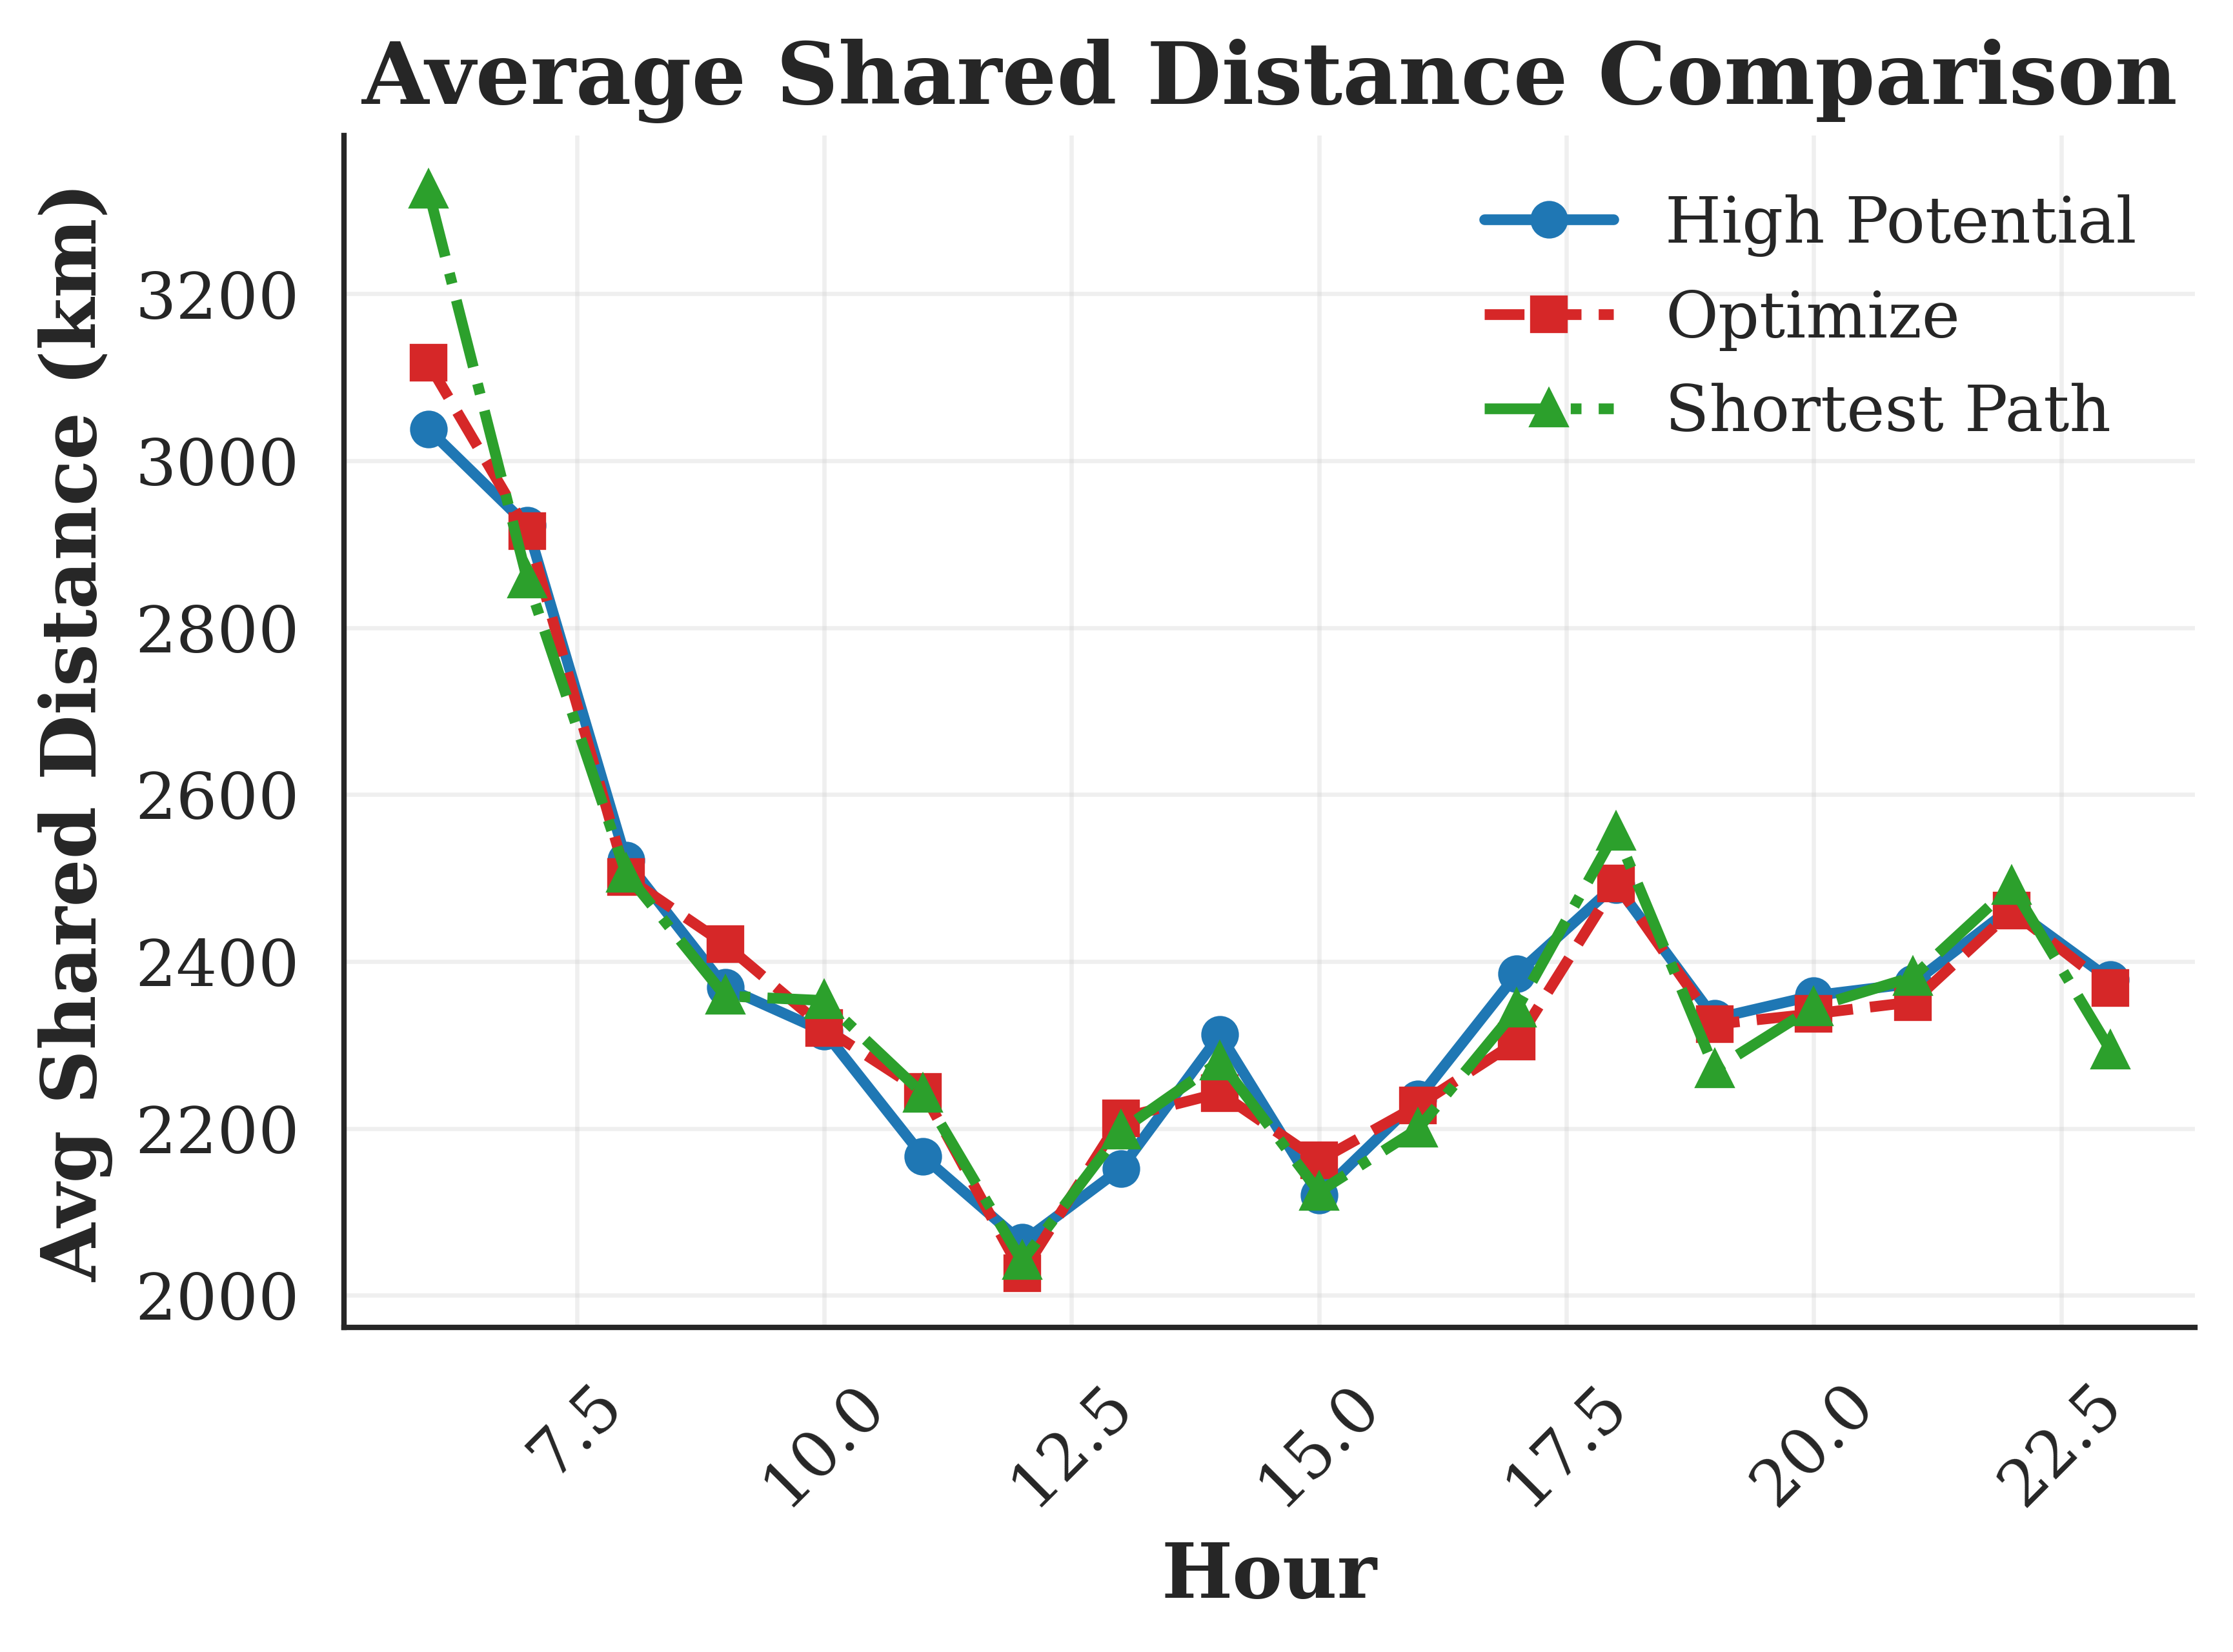

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast

# Store calculated metrics
metrics = {
    'hour': [],
    'response_rate_hp': [], 'response_rate_opt': [], 'response_rate_sho': [],
    'pooling_rate_hp': [], 'pooling_rate_opt': [], 'pooling_rate_sho': [],
    'total_saved_distance_hp': [], 'total_saved_distance_opt': [], 'total_saved_distance_sho': [],
    'avg_detour_distance_hp': [], 'avg_detour_distance_opt': [], 'avg_detour_distance_sho': [],
    'avg_shared_distance_hp': [], 'avg_shared_distance_opt': [], 'avg_shared_distance_sho': []
}

# Define a conversion function to transform string representations into lists
def convert_to_list(x):
    try:
        return ast.literal_eval(x)
    except Exception:
        return x

# Function to compute the mean of a cell if it is a list; returns NaN if empty or not a list.
def compute_cell_mean(cell):
    if isinstance(cell, list) and len(cell) > 0:
        return np.mean(cell)
    else:
        return np.nan

# Traverse each hour (from 6 to 23)
for hour in range(6, 24):
    # Read CSV files for each service mode
    result_hp = pd.read_csv(f'output/different_hour/0_shortest_path/simulation_hour_{hour}.csv', index_col=0)
    result_opt = pd.read_csv(f'output/different_hour/optimize/simulation_hour_{hour}.csv', index_col=0)
    result_sho = pd.read_csv(f'output/different_hour/1_shortest_path/simulation_hour_{hour}.csv', index_col=0)

    # List of columns that are stored as string representations of lists
    columns_to_convert = ['detour_distance', 'shared_distance', 'total_travel_distance', 'saved_travel_distance']
    for col in columns_to_convert:
        if col in result_hp.columns:
            result_hp[col] = result_hp[col].apply(convert_to_list)
            result_opt[col] = result_opt[col].apply(convert_to_list)
            result_sho[col] = result_sho[col].apply(convert_to_list)

    # Modified compute_metrics function to compute the mean of each cell's list values.
    def compute_metrics(result):
        response_rate = result["responded_order_num"].sum() / result["his_order_num"].sum()
        pooling_rate = result["pooled_order_num"].sum() / result["responded_order_num"].replace(0, np.nan).sum()
        # For each column that stores list data, apply compute_cell_mean row-wise and then take the overall mean.
        avg_detour_distance = result["detour_distance"].apply(compute_cell_mean).mean()
        avg_shared_distance = result["shared_distance"].apply(compute_cell_mean).mean()
        total_saved_distance = result["saved_travel_distance"].apply(compute_cell_mean).sum()
        return response_rate, pooling_rate, avg_detour_distance, avg_shared_distance, total_saved_distance

    # Append current hour and compute metrics for each service mode
    metrics['hour'].append(hour)
    hp_metrics = compute_metrics(result_hp)
    opt_metrics = compute_metrics(result_opt)
    sho_metrics = compute_metrics(result_sho)

    metrics['response_rate_hp'].append(hp_metrics[0])
    metrics['response_rate_opt'].append(opt_metrics[0])
    metrics['response_rate_sho'].append(sho_metrics[0])

    metrics['pooling_rate_hp'].append(hp_metrics[1])
    metrics['pooling_rate_opt'].append(opt_metrics[1])
    metrics['pooling_rate_sho'].append(sho_metrics[1])

    metrics['avg_detour_distance_hp'].append(hp_metrics[2])
    metrics['avg_detour_distance_opt'].append(opt_metrics[2])
    metrics['avg_detour_distance_sho'].append(sho_metrics[2])

    metrics['avg_shared_distance_hp'].append(hp_metrics[3])
    metrics['avg_shared_distance_opt'].append(opt_metrics[3])
    metrics['avg_shared_distance_sho'].append(sho_metrics[3])

    metrics['total_saved_distance_hp'].append(hp_metrics[4])
    metrics['total_saved_distance_opt'].append(opt_metrics[4])
    metrics['total_saved_distance_sho'].append(sho_metrics[4])

# Convert the metrics dictionary to a DataFrame and sort by hour
df = pd.DataFrame(metrics)
df = df.sort_values(by='hour')

# Set SCI paper style for plotting
sns.set(style="white", context="paper", font_scale=1.5, rc={"font.family": "serif"})
colors = ["#1f77b4", "#d62728", "#2ca02c"]  # Representing High Potential, Optimize, and New Data respectively

# Define a generic plotting function for comparing the three service modes
def plot_comparison(x, y1, y2, y3, ylabel, title, filename):
    fig, ax = plt.subplots(figsize=(6, 4.5), dpi=600)
    ax.plot(x, y1, marker='o', color=colors[0], markersize=6, linestyle='-', linewidth=2, label='High Potential')
    ax.plot(x, y2, marker='s', color=colors[1], markersize=6, linestyle='--', linewidth=2, label='Optimize')
    ax.plot(x, y3, marker='^', color=colors[2], markersize=6, linestyle='-.', linewidth=2, label='Shortest Path')
    ax.set_xlabel("Hour", fontsize=14, fontweight='bold')
    ax.set_ylabel(ylabel, fontsize=14, fontweight='bold')
    ax.set_title(title, fontsize=16, fontweight='bold')
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.grid(alpha=0.3)
    ax.legend(fontsize=12, frameon=False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig('./figure/'+filename, dpi=600, bbox_inches='tight', transparent=True)
    plt.show()

# Plot comparison graphs for each metric
plot_comparison(df['hour'], df['response_rate_hp'], df['response_rate_opt'], df['response_rate_sho'], 
                "Response Rate", "Overall Response Rate Comparison", "different_hour_response_rate.png")

plot_comparison(df['hour'], df['pooling_rate_hp'], df['pooling_rate_opt'], df['pooling_rate_sho'], 
                "Pooling Rate", "Overall Pooling Rate Comparison", "different_hour_pooling_rate.png")

plot_comparison(df['hour'], df['total_saved_distance_hp'], df['total_saved_distance_opt'], df['total_saved_distance_sho'], 
                "Total Saved Distance (km)", "Total Saved Travel Distance Comparison", "different_hour_total_saved_distance.png")

plot_comparison(df['hour'], df['avg_detour_distance_hp'], df['avg_detour_distance_opt'], df['avg_detour_distance_sho'], 
                "Avg Detour Distance (km)", "Average Detour Distance Comparison", "different_hour_avg_detour_distance.png")

plot_comparison(df['hour'], df['avg_shared_distance_hp'], df['avg_shared_distance_opt'], df['avg_shared_distance_sho'], 
                "Avg Shared Distance (km)", "Average Shared Distance Comparison", "different_hour_avg_shared_distance.png")
